## importing required libraries

In [1]:

import requests as rs
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re


### i applied following filters for scrapping this data

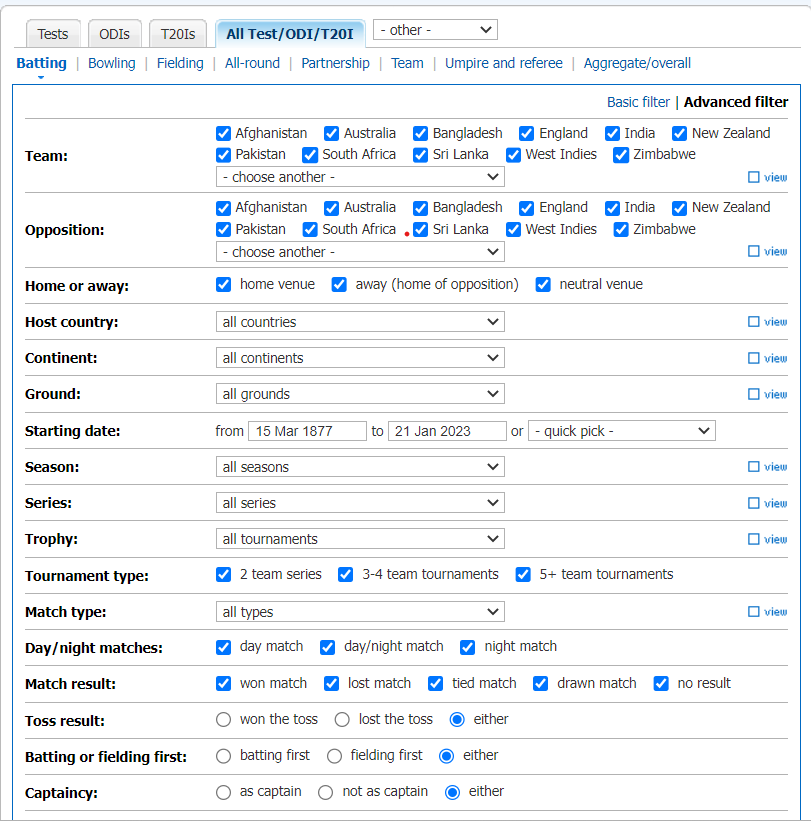

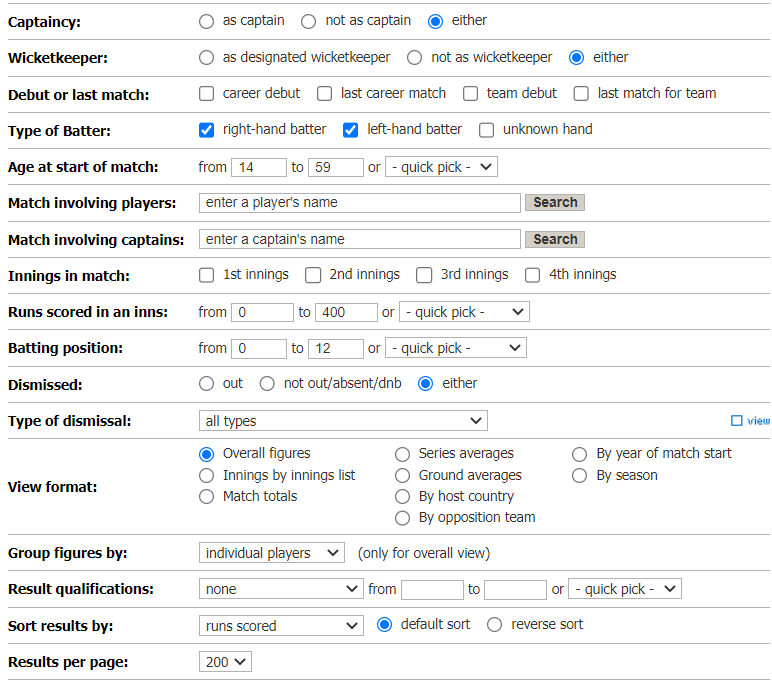

In [19]:
#looping for extract the data from multiple pages
name=[]
country=[]
year=[]    # creating empty list for appending the extracted data
mat=[]
inn=[]
no=[]
runs=[]
hs=[]
ave=[]
bf=[]
sr=[]
hun=[]
fif=[]
duc=[]
for i in range(1,20): # we have 19 pages to extract of 3800 rows 
    url="https://stats.espncricinfo.com/ci/engine/stats/index.html?batting_hand=1;batting_hand=2;class=11;filter=advanced;floodlit=1;floodlit=2;floodlit=3;home_or_away=1;home_or_away=2;home_or_away=3;opposition=1;opposition=2;opposition=25;opposition=3;opposition=4;opposition=40;opposition=5;opposition=6;opposition=7;opposition=8;opposition=9;orderby=runs;page=i;result=1;result=2;result=3;result=4;result=5;size=200;team=1;team=2;team=25;team=3;team=4;team=40;team=5;team=6;team=7;team=8;team=9;template=results;tournament_type=2;tournament_type=3;tournament_type=5;type=batting"
    page=rs.get(url) #requesting the website
    data=bs(page.text) 
    batting=data.find_all("tr",class_="data1")
    for i in batting:
        name.append("".join(re.findall(r"\n(\w+ \w+ \w+|\w+ \w+\s)\(",i.text)))
        year.append("".join(re.findall(r"\n(\d+-\d+)\n",i.text)))
        country.append("".join(re.findall(r"\((\w+)\)",i.text)))
        mat.append(i.text.split("\n")[3])
        inn.append(i.text.split("\n")[4])
        no.append(i.text.split("\n")[5])
        runs.append(i.text.split("\n")[6])
        hs.append(i.text.split("\n")[7])
        ave.append(i.text.split("\n")[8])
        hun.append(i.text.split("\n")[9])
        fif.append(i.text.split("\n")[10])
        duc.append(i.text.split("\n")[11])


In [21]:
#creating the data frame from the above data
data=pd.DataFrame({"player_name":name,
            "country":country,
             "span":year,
             "matches_played":mat,
             "innings":inn,
             "not_outs":no,
             "total_runs":runs,
             "highest_score":hs,
             "average":ave,
             "hundreads":hun,
             "fifties":fif,
             "ducks":duc})

In [22]:
data


,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks
0,SR Tendulkar,IND,1989-2013,646,765,70,33299,248*,47.91,95,160,34
1,KC Sangakkara,SL,2000-2015,571,644,63,27151,319,46.73,61,148,27
2,RT Ponting,AUS,1995-2012,542,653,69,26844,257,45.96,69,143,39
3,V Kohli,IND,2008-2023,478,591,80,26479,254*,51.81,76,139,39
4,DPMD Jayawardene,SL,1997-2015,629,704,59,25024,374,38.79,52,129,46
...,...,...,...,...,...,...,...,...,...,...,...,...
3795,A Jadeja,IND,1992-2000,205,198,37,5726,119,35.56,6,31,11
3796,DA Miller,SA,2010-2022,245,217,72,5724,139,39.47,7,27,9
3797,AH Jones,NZ,1987-1995,126,161,17,5706,186,39.62,7,36,6
3798,JO Holder,WI,2013-2022,224,284,53,5697,202*,24.66,3,25,30


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   player_name     3800 non-null   object
 1   country         3800 non-null   object
 2   span            3800 non-null   object
 3   matches_played  3800 non-null   object
 4   innings         3800 non-null   object
 5   not_outs        3800 non-null   object
 6   total_runs      3800 non-null   object
 7   highest_score   3800 non-null   object
 8   average         3800 non-null   object
 9   hundreads       3800 non-null   object
 10  fifties         3800 non-null   object
 11  ducks           3800 non-null   object
dtypes: object(12)
memory usage: 356.4+ KB


#### from the above dataframe we have 3800 rows and 12 columns which were separated them,no rows having any null value 

# Data cleanning

In [24]:
#average contains special(-) symbol replacing with 0 because average contains only int value
data["average"]=data["average"].replace({"-":0}) 
data["matches_played"]=data["matches_played"].replace({"-":0})


In [26]:
# highest_score this columns contains un-necessary symbols with int values so replacing them with empty spaces
data["highest_score"]=data["highest_score"].apply(lambda x:x.replace("*",""))


In [27]:
data

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks
0,SR Tendulkar,IND,1989-2013,646,765,70,33299,248,47.91,95,160,34
1,KC Sangakkara,SL,2000-2015,571,644,63,27151,319,46.73,61,148,27
2,RT Ponting,AUS,1995-2012,542,653,69,26844,257,45.96,69,143,39
3,V Kohli,IND,2008-2023,478,591,80,26479,254,51.81,76,139,39
4,DPMD Jayawardene,SL,1997-2015,629,704,59,25024,374,38.79,52,129,46
...,...,...,...,...,...,...,...,...,...,...,...,...
3795,A Jadeja,IND,1992-2000,205,198,37,5726,119,35.56,6,31,11
3796,DA Miller,SA,2010-2022,245,217,72,5724,139,39.47,7,27,9
3797,AH Jones,NZ,1987-1995,126,161,17,5706,186,39.62,7,36,6
3798,JO Holder,WI,2013-2022,224,284,53,5697,202,24.66,3,25,30


In [28]:
# in player_name column i have empty cells so replacing them with nan value
data = data.replace(r'^\s*$', np.nan, regex=True)

In [29]:
data.head(69)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks
0,SR Tendulkar,IND,1989-2013,646,765,70,33299,248,47.91,95,160,34
1,KC Sangakkara,SL,2000-2015,571,644,63,27151,319,46.73,61,148,27
2,RT Ponting,AUS,1995-2012,542,653,69,26844,257,45.96,69,143,39
3,V Kohli,IND,2008-2023,478,591,80,26479,254,51.81,76,139,39
4,DPMD Jayawardene,SL,1997-2015,629,704,59,25024,374,38.79,52,129,46
...,...,...,...,...,...,...,...,...,...,...,...,...
64,NaN,SA,2012-2022,256,324,23,12121,178,40.26,24,71,18
65,NJ Astle,NZ,1995-2007,303,353,24,11697,222,35.55,26,65,29
66,BA Stokes,ENG,2011-2022,234,355,36,11596,258,36.35,21,61,23
67,RR Sarwan,WI,2000-2013,275,329,39,11535,291,39.77,19,71,21


In [33]:
#droping the complete row where ever the player_name column is nan.(without player name the complete row is un-necessary)
 data.dropna(inplace=True)
#data.reset_index(inplace=True)

In [34]:
data

,index,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks
0,0,SR Tendulkar,IND,1989-2013,646,765,70,33299,248,47.91,95,160,34
1,1,KC Sangakkara,SL,2000-2015,571,644,63,27151,319,46.73,61,148,27
2,2,RT Ponting,AUS,1995-2012,542,653,69,26844,257,45.96,69,143,39
3,3,V Kohli,IND,2008-2023,478,591,80,26479,254,51.81,76,139,39
4,4,DPMD Jayawardene,SL,1997-2015,629,704,59,25024,374,38.79,52,129,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,3795,A Jadeja,IND,1992-2000,205,198,37,5726,119,35.56,6,31,11
3587,3796,DA Miller,SA,2010-2022,245,217,72,5724,139,39.47,7,27,9
3588,3797,AH Jones,NZ,1987-1995,126,161,17,5706,186,39.62,7,36,6
3589,3798,JO Holder,WI,2013-2022,224,284,53,5697,202,24.66,3,25,30


In [37]:
data.drop("index",axis=1,inplace=True)

In [38]:
data

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks
0,SR Tendulkar,IND,1989-2013,646,765,70,33299,248,47.91,95,160,34
1,KC Sangakkara,SL,2000-2015,571,644,63,27151,319,46.73,61,148,27
2,RT Ponting,AUS,1995-2012,542,653,69,26844,257,45.96,69,143,39
3,V Kohli,IND,2008-2023,478,591,80,26479,254,51.81,76,139,39
4,DPMD Jayawardene,SL,1997-2015,629,704,59,25024,374,38.79,52,129,46
...,...,...,...,...,...,...,...,...,...,...,...,...
3586,A Jadeja,IND,1992-2000,205,198,37,5726,119,35.56,6,31,11
3587,DA Miller,SA,2010-2022,245,217,72,5724,139,39.47,7,27,9
3588,AH Jones,NZ,1987-1995,126,161,17,5706,186,39.62,7,36,6
3589,JO Holder,WI,2013-2022,224,284,53,5697,202,24.66,3,25,30


In [39]:
#cleaned data storing into the excel file
data.to_excel(r"C:\Users\pujal\OneDrive\Documents\extra.xlsx")

In [2]:
# reading excel file
data=pd.read_excel(r"C:\Users\pujal\OneDrive\Documents\extra.xlsx")
data


,Unnamed: 0,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks
0,0,SR Tendulkar,IND,1989-2013,646,765,70,33299,248,47.91,95,160,34
1,1,KC Sangakkara,SL,2000-2015,571,644,63,27151,319,46.73,61,148,27
2,2,RT Ponting,AUS,1995-2012,542,653,69,26844,257,45.96,69,143,39
3,3,V Kohli,IND,2008-2023,478,591,80,26479,254,51.81,76,139,39
4,4,DPMD Jayawardene,SL,1997-2015,629,704,59,25024,374,38.79,52,129,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,3586,A Jadeja,IND,1992-2000,205,198,37,5726,119,35.56,6,31,11
3587,3587,DA Miller,SA,2010-2022,245,217,72,5724,139,39.47,7,27,9
3588,3588,AH Jones,NZ,1987-1995,126,161,17,5706,186,39.62,7,36,6
3589,3589,JO Holder,WI,2013-2022,224,284,53,5697,202,24.66,3,25,30


In [3]:
#dropping un-necessary column
data.drop("Unnamed: 0",inplace=True,axis=1)

In [4]:
data


,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks
0,SR Tendulkar,IND,1989-2013,646,765,70,33299,248,47.91,95,160,34
1,KC Sangakkara,SL,2000-2015,571,644,63,27151,319,46.73,61,148,27
2,RT Ponting,AUS,1995-2012,542,653,69,26844,257,45.96,69,143,39
3,V Kohli,IND,2008-2023,478,591,80,26479,254,51.81,76,139,39
4,DPMD Jayawardene,SL,1997-2015,629,704,59,25024,374,38.79,52,129,46
...,...,...,...,...,...,...,...,...,...,...,...,...
3586,A Jadeja,IND,1992-2000,205,198,37,5726,119,35.56,6,31,11
3587,DA Miller,SA,2010-2022,245,217,72,5724,139,39.47,7,27,9
3588,AH Jones,NZ,1987-1995,126,161,17,5706,186,39.62,7,36,6
3589,JO Holder,WI,2013-2022,224,284,53,5697,202,24.66,3,25,30


In [5]:
# converting the column type into exact type
data["matches_played"]=data["matches_played"].astype(int)
data["innings"]=data["innings"].astype(int)
data["not_outs"]=data["not_outs"].astype(int)
data["total_runs"]=data["total_runs"].astype(int)
data["highest_score"]=data["highest_score"].astype(int)
data["average"]=data["average"].astype(float)
data["hundreads"]=data["hundreads"].astype(int)
data["fifties"]=data["fifties"].astype(int)
data["ducks"]=data["ducks"].astype(int)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3591 entries, 0 to 3590
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player_name     3591 non-null   object 
 1   country         3591 non-null   object 
 2   span            3591 non-null   object 
 3   matches_played  3591 non-null   int32  
 4   innings         3591 non-null   int32  
 5   not_outs        3591 non-null   int32  
 6   total_runs      3591 non-null   int32  
 7   highest_score   3591 non-null   int32  
 8   average         3591 non-null   float64
 9   hundreads       3591 non-null   int32  
 10  fifties         3591 non-null   int32  
 11  ducks           3591 non-null   int32  
dtypes: float64(1), int32(8), object(3)
memory usage: 224.6+ KB


- after cleanning i removed a total of 209 rows from the data

- the data frame contain three object columns and 9 numerical columns

In [45]:
data.isnull().sum()

player_name       0
country           0
span              0
matches_played    0
innings           0
not_outs          0
total_runs        0
highest_score     0
average           0
hundreads         0
fifties           0
ducks             0
dtype: int64

- from the data there is no-null values

In [46]:
# finding the outliers.
for i in data.columns[3:12]:
    x=np.percentile(data[i],[25,50,75])
    iqr=x[2]-x[0]
    lb=x[0]-(1.5*iqr)
    ub=x[2]+(1.5*iqr)
    print(i)
    print(len(data.loc[data["matches_played"]<lb]))
    print(len(data.loc[data["matches_played"]>ub]))
    print("---------------------------------------------------------------")

matches_played
0
76
---------------------------------------------------------------
innings
0
19
---------------------------------------------------------------
not_outs
0
3363
---------------------------------------------------------------
total_runs
0
0
---------------------------------------------------------------
highest_score
0
684
---------------------------------------------------------------
average
0
3572
---------------------------------------------------------------
hundreads
0
3591
---------------------------------------------------------------
fifties
0
3116
---------------------------------------------------------------
ducks
0
3591
---------------------------------------------------------------


####  Replacing outliers with the mean can be problematic because it can change the distribution of the data and skew the results. It's important to first understand why the outliers exist and if they are legitimate data points before deciding to replace them. In many cases, it may be more appropriate to keep the outliers and analyze the data with them included, or to exclude them from the analysis altogether.





- in this data the outliers are important so i am not replacing them with mean or median,for numerical column

# DATA-ANALYSIS

## Univariate analysis
- Univariate analysis is the simplest form of data analysis, where we analyze one variable at a time. 

In [48]:
data

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks
0,SR Tendulkar,IND,1989-2013,646,765,70,33299,248,47.91,95,160,34
1,KC Sangakkara,SL,2000-2015,571,644,63,27151,319,46.73,61,148,27
2,RT Ponting,AUS,1995-2012,542,653,69,26844,257,45.96,69,143,39
3,V Kohli,IND,2008-2023,478,591,80,26479,254,51.81,76,139,39
4,DPMD Jayawardene,SL,1997-2015,629,704,59,25024,374,38.79,52,129,46
...,...,...,...,...,...,...,...,...,...,...,...,...
3586,A Jadeja,IND,1992-2000,205,198,37,5726,119,35.56,6,31,11
3587,DA Miller,SA,2010-2022,245,217,72,5724,139,39.47,7,27,9
3588,AH Jones,NZ,1987-1995,126,161,17,5706,186,39.62,7,36,6
3589,JO Holder,WI,2013-2022,224,284,53,5697,202,24.66,3,25,30


## object columns

In [49]:
data["country"].unique()

array(['IND', 'SL', 'AUS', 'SA', 'WI', 'ENG', 'NZ', 'PAK', 'BAN', 'ZIM'],
      dtype=object)

In [50]:
data["country"].value_counts()

AUS    627
ENG    627
IND    494
PAK    437
SL     361
WI     342
NZ     285
SA     247
ZIM     95
BAN     76
Name: country, dtype: int64

- The data is in-balanced based on the country column,
- more no.of observations are taken from the aus and eng countries least were taken from the ban


In [51]:
data["span"].value_counts()

2011-2022    133
2010-2022    114
2009-2022     76
2015-2023     57
2004-2019     57
            ... 
2004-2013     19
1983-1996     19
2003-2021     19
1982-2000     19
2013-2022     19
Name: span, Length: 148, dtype: int64

- more no players are played in the span of 2011-2022(ofter world cup)
- least no of players are played in the span of 2013-2022

## numerical columns

In [52]:
data["matches_played"].describe()

count    3591.000000
mean      264.830688
std       118.604740
min        52.000000
25%       184.000000
50%       251.000000
75%       337.000000
max       646.000000
Name: matches_played, dtype: float64

- The highest no.of matches played by a player is 646 and least matches is 52.
- The average matches played by players is 264.
- There are 25% players played less than 184 matches.
- There are 25% players played grater than 337 matches.
- there are 25% players played grater than 187 and less than 251 matches.
- There are 25% players played grater than 251 and less than 337 matches.

In [53]:
data["innings"].describe()

count    3591.000000
mean      316.661376
std       122.576207
min        80.000000
25%       226.000000
50%       294.000000
75%       392.000000
max       765.000000
Name: innings, dtype: float64

- the maximum no of innings  played by a player is 765,and minimum no.of innings played by a player is 80.( its changes from the matches played by a player because test contains more than 2 innings and may be some times matches will be draw).
- the average innings played by a player is 80.
- 25% players played less than 226 innings.
- 25% players played more than 392 innings.
- 25% players played more than 226 and less than 294 innings.
- 25% players played more than 294 and less than 765 innings.

In [54]:
data["not_outs"].describe()

count    3591.000000
mean       35.751323
std        23.458652
min         5.000000
25%        17.000000
50%        31.000000
75%        47.000000
max       139.000000
Name: not_outs, dtype: float64

- the maximum times player notouts is 139 and min is 5.
- the average notouts of players is 35.
- there are 25% of players are notout less than 17 times.
- there are 25% of players are notout greater than 47 times.
- there are 25% of players are less than 31 and grater than 17 times notout.
- there are 25% of players are less than 47 and grater than 31 times notout.

In [55]:
data["total_runs"].describe()

count     3591.000000
mean     10825.846561
std       5070.010016
min       5687.000000
25%       6948.000000
50%       9225.000000
75%      13169.000000
max      33299.000000
Name: total_runs, dtype: float64

- There maximum no of total runs of a player is 33299,and minimum runs is 5687.
- the average total runs of a player is 10825.
- there are 25% of players total runs is less than 6948.
- there are 25% of players total runs is grater than 13169.
- there are 25% of players total runs less than 9225 and grater than 6948.
- there are 25% of players total runs less than 13169 and grater than 9225.

In [56]:
data["highest_score"].describe()

count    3591.000000
mean      212.507937
std        61.435124
min       108.000000
25%       169.000000
50%       205.000000
75%       248.000000
max       400.000000
Name: highest_score, dtype: float64

- the maximum highest score of the player is 400, and minimum is 108.
- the average highest score of a player is 212.
- there are 25% of players score less than 169.
- there are 25% of players score is grater than 248.
- there are 25% of players score less than 205 and grater than 169.
- there are 25% of players score less than 248 and grater than 205.

In [57]:
data["average"].describe()

count    3591.000000
mean       38.712698
std         8.558281
min        18.590000
25%        33.470000
50%        38.100000
75%        42.870000
max        99.940000
Name: average, dtype: float64

- the average minimum score of the player is 18 and maximum is 100.
- the average of average score of the player is 38.
- there are 25% of players their average score is less than 33
- there are 25% of players their average score is grater than 43.
- there are 25% of players their average score is less than 38 and grater than 33.
- there are 25% of players their average score is less than 42 and grater than 38

In [58]:
data["hundreads"].describe()

count    3591.000000
mean       20.941799
std        14.610932
min         2.000000
25%        11.000000
50%        18.000000
75%        26.000000
max        95.000000
Name: hundreads, dtype: float64

- the maximum no of hundreds hit by a player is 95, and minimum is 2.
- the average hundreads scored by the players is 21.
- there are 25% players scored less than 11 centuries.
- there are 25% players scored grater than 26 centuries.
- there are 25% players scored less than 18 and grater than 11 centuries.
- there are 25% players scored less than 26 and grater than 18

In [59]:
data["fifties"].describe()

count    3591.000000
mean       57.735450
std        28.141597
min        13.000000
25%        36.000000
50%        50.000000
75%        72.000000
max       160.000000
Name: fifties, dtype: float64

- the maximum no of fifties hit by a player is 160 and minimum is 13.
- the average players fifties is 57.
- there are 25% players hitted less than 36 fifties.
- there are 25% players hitted grater than 72 fifties.
- there are 25% players hitted less than 50 and gratter than 13 fifties.
- there are 25% players hitted less than 72 and grater than 50 fifties.

In [61]:
data["ducks"].describe()

count    3591.000000
mean       20.666667
std         9.442864
min         4.000000
25%        14.000000
50%        20.000000
75%        26.000000
max        53.000000
Name: ducks, dtype: float64

- the maximum no of duck outs of a player is 53 and minimum is 4.
- the average duck outs of player is 20.
- there 25% players dissmissed by duck out less than 4 times.
- there are 25% of players dismissed by duckouts greater than 26 times.
- there are 25% of players dismmissed by duckouts in the range of 14 to 20.
- there are 25% of players dismmissed by duckouts in the range of 20 to 26.

In [8]:
# splitting the span into carrer starting year and ending year
data["starting_year"]=data["span"].apply(lambda x:x.split("-")).apply(lambda x:x[0])

In [9]:
# ending year
data["ending_year"]=data["span"].apply(lambda x:x.split("-")).apply(lambda x:x[1])

In [10]:
data

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks,starting_year,ending_year
0,SR Tendulkar,IND,1989-2013,646,765,70,33299,248,47.91,95,160,34,1989,2013
1,KC Sangakkara,SL,2000-2015,571,644,63,27151,319,46.73,61,148,27,2000,2015
2,RT Ponting,AUS,1995-2012,542,653,69,26844,257,45.96,69,143,39,1995,2012
3,V Kohli,IND,2008-2023,478,591,80,26479,254,51.81,76,139,39,2008,2023
4,DPMD Jayawardene,SL,1997-2015,629,704,59,25024,374,38.79,52,129,46,1997,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,A Jadeja,IND,1992-2000,205,198,37,5726,119,35.56,6,31,11,1992,2000
3587,DA Miller,SA,2010-2022,245,217,72,5724,139,39.47,7,27,9,2010,2022
3588,AH Jones,NZ,1987-1995,126,161,17,5706,186,39.62,7,36,6,1987,1995
3589,JO Holder,WI,2013-2022,224,284,53,5697,202,24.66,3,25,30,2013,2022


# visualization

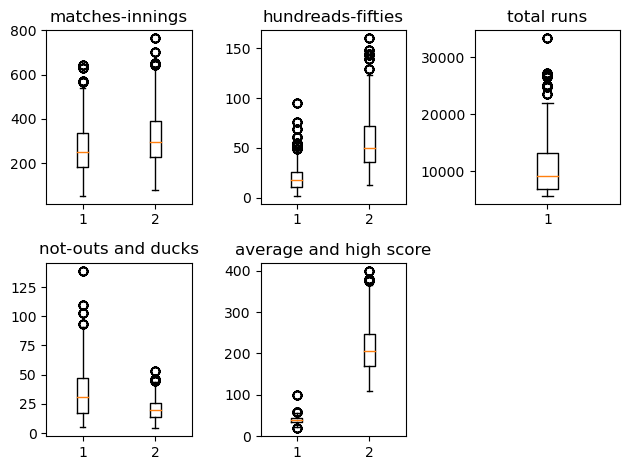

In [8]:
plt.subplot(2, 3, 1)
plt.boxplot(data[["matches_played","innings"]])
plt.title("matches-innings")
plt.subplot(2, 3, 2)
plt.boxplot(data[["hundreads","fifties"]])
plt.title("hundreads-fifties")
plt.subplot(2, 3, 3)
plt.boxplot(data[["total_runs"]])
plt.title("total runs")
plt.subplot(2, 3, 4)
plt.boxplot(data[["not_outs","ducks"]])
plt.title("not-outs and ducks")
plt.subplot(2, 3, 5)
plt.boxplot(data[["average","highest_score"]])
plt.title("average and high score")

plt.tight_layout()
plt.show()

Replacing outliers with the mean can be problematic because it can change the distribution of the data and skew the results. It's important to first understand why the outliers exist and if they are legitimate data points before deciding to replace them. In many cases, it may be more appropriate to keep the outliers and analyze the data with them included, or to exclude them from the analysis altogether.¶
in this data the outliers are important so i am not replacing them with mean or median,for numerical column

In [ ]:
# finding the player starting year and ending years.

C:\Users\pujal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


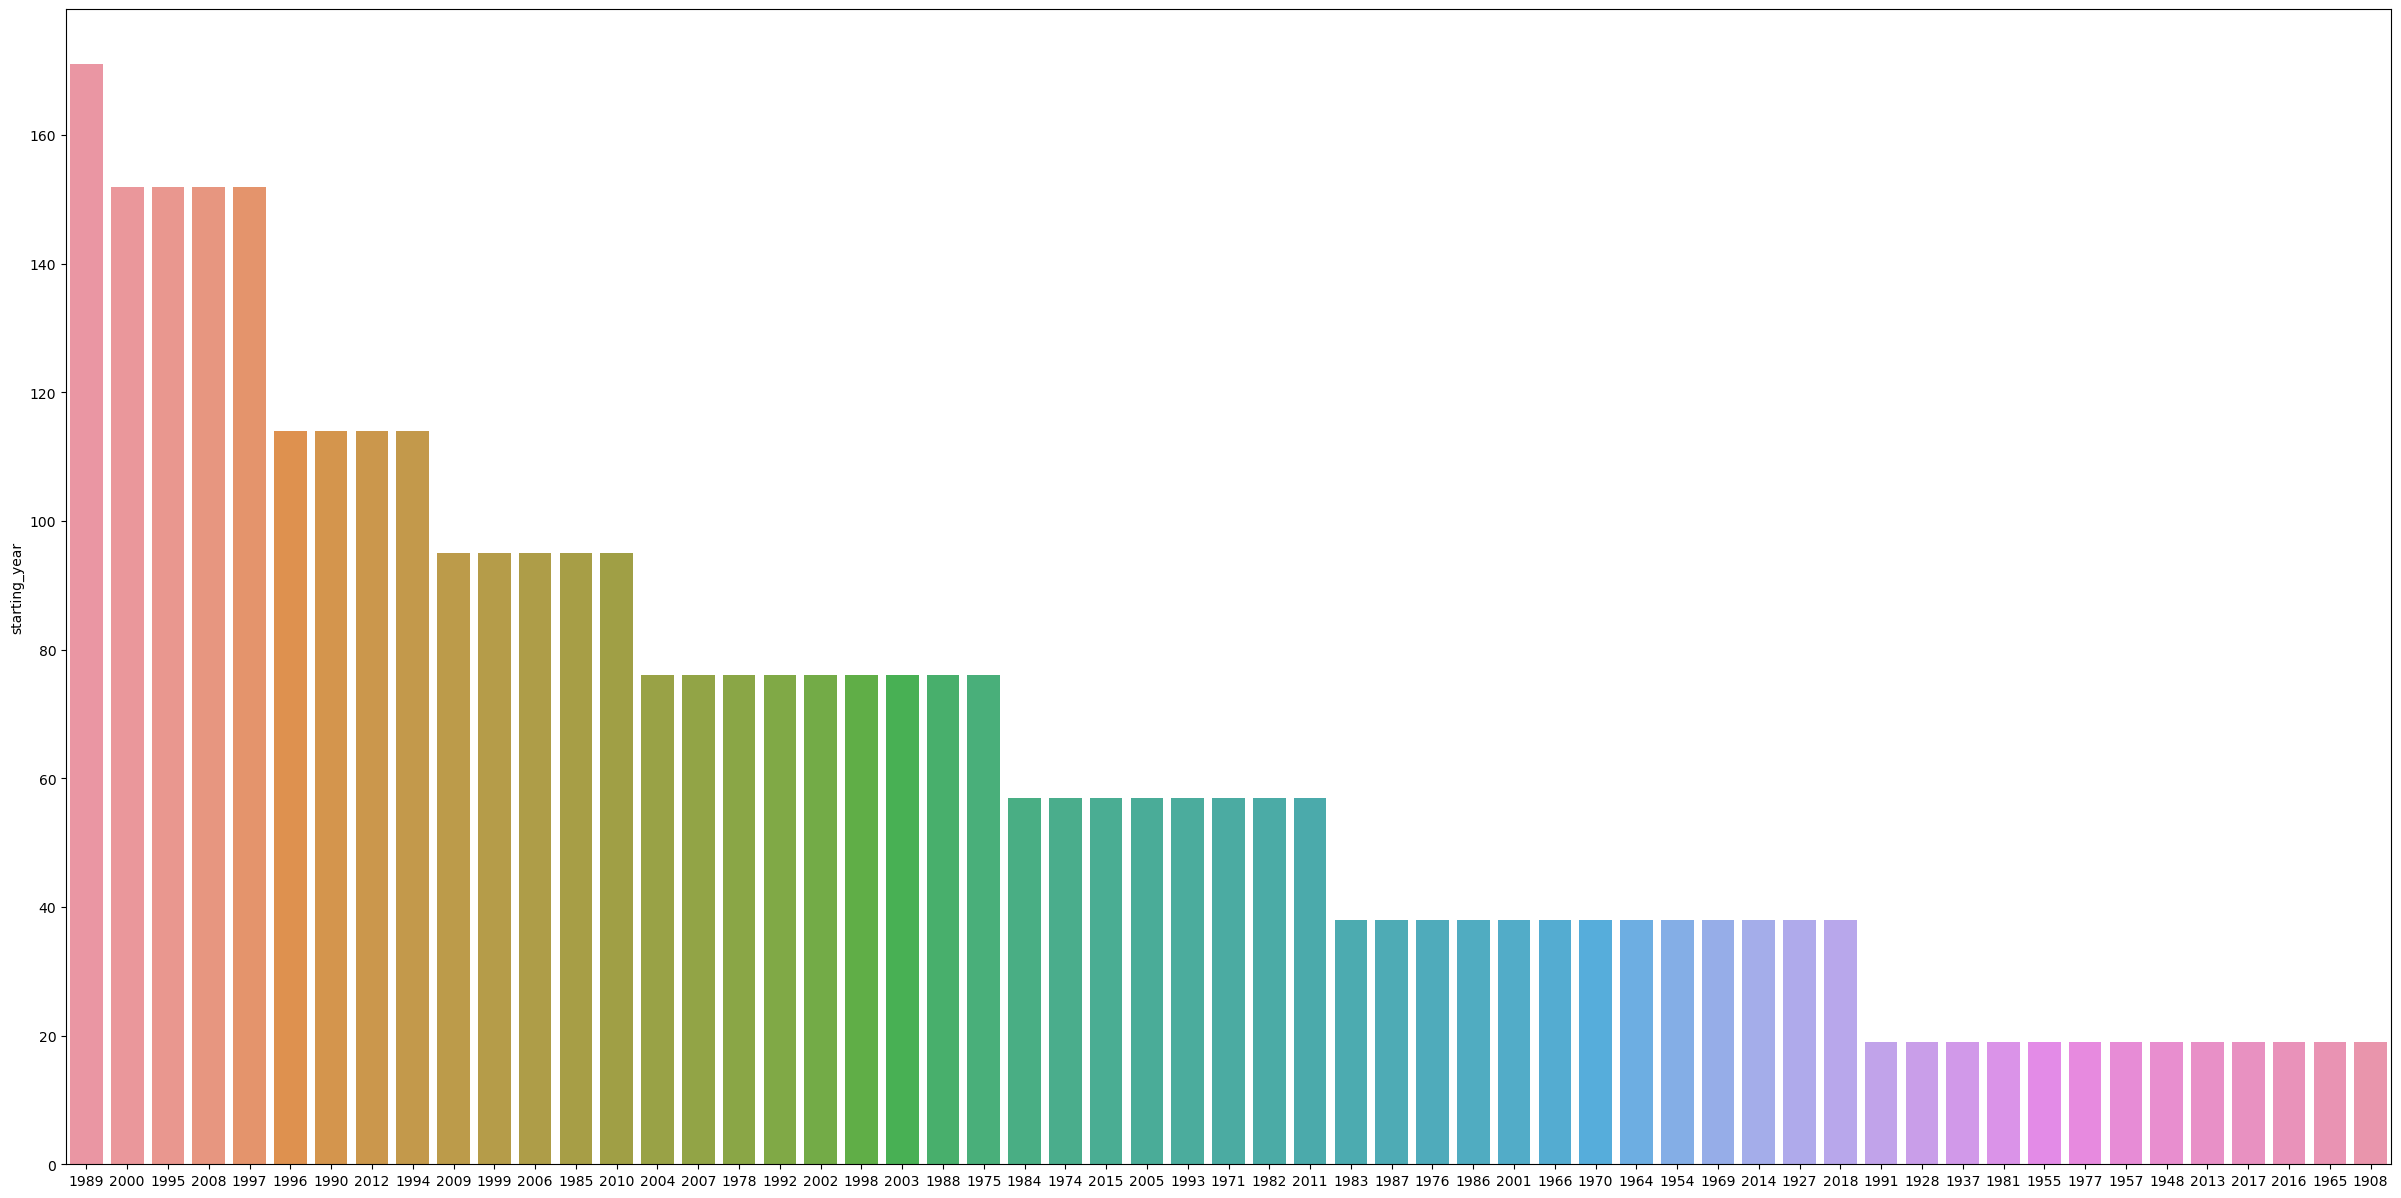

In [14]:
a=data["starting_year"].value_counts()
plt.figure(figsize=(30,15))
sns.barplot(data["starting_year"].unique(),a)
plt.show()

- most no of players started their caarrior in the year 1989,and least from 1908.
- 2013,1908,2017,2016,1955,1977 has equal no of players started their carrier.

C:\Users\pujal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


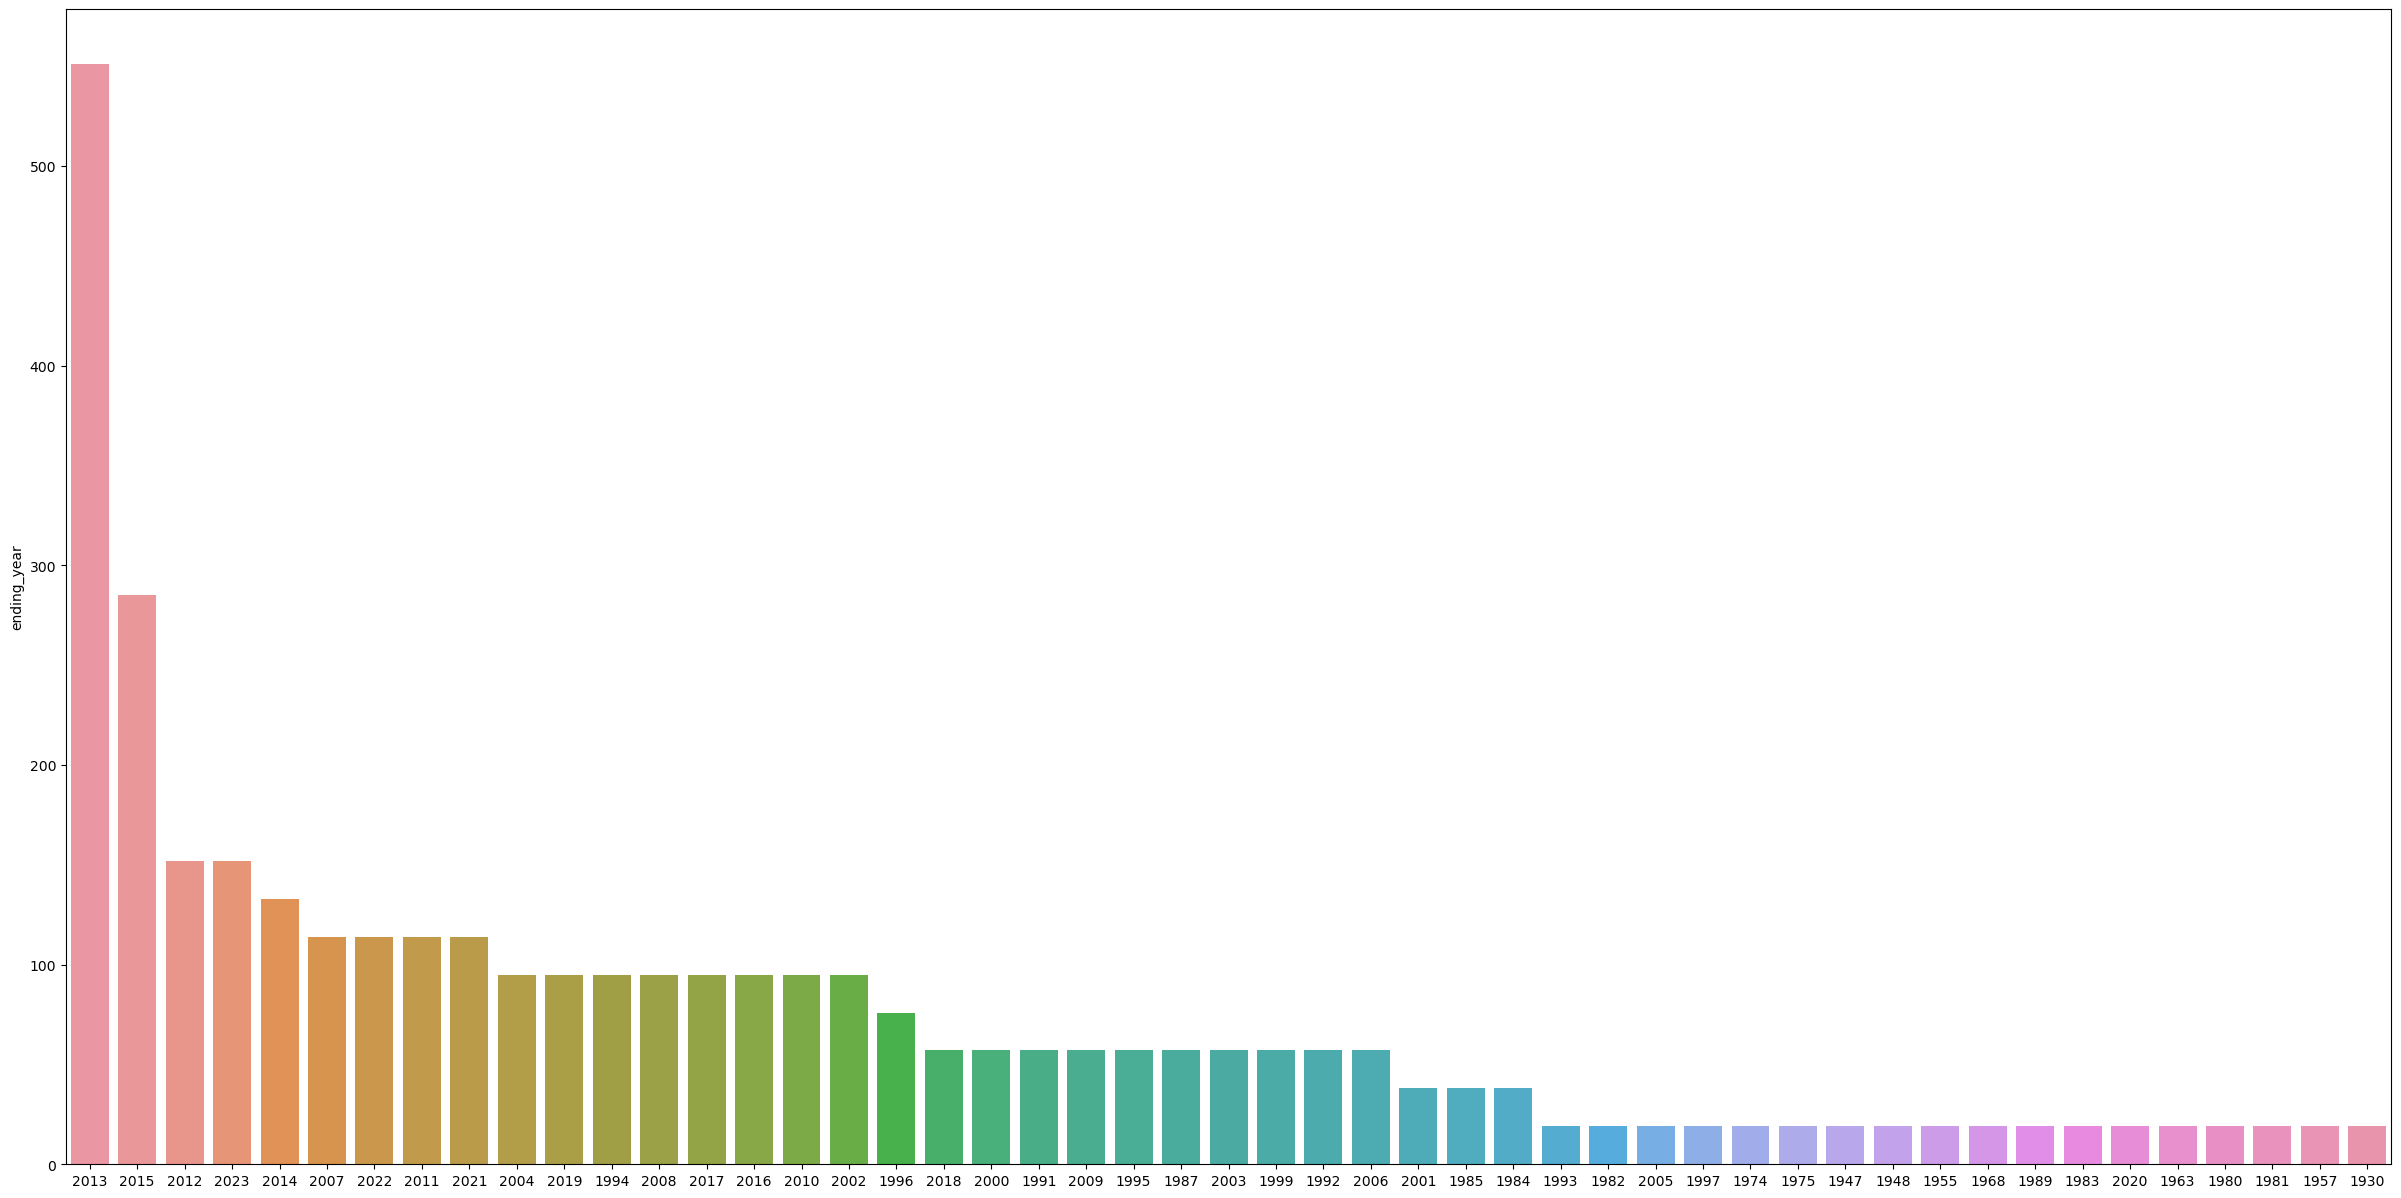

In [15]:
a=data["ending_year"].value_counts()
plt.figure(figsize=(30,15))
sns.barplot(data["ending_year"].unique(),a)
plt.show()

- most no of players ending their carrior in the year 2013 and lest from the years 1930,1957,1981,2020,1955.

- Here i am using histogram because the best way to represent a numerical column in graphical format is histogram.

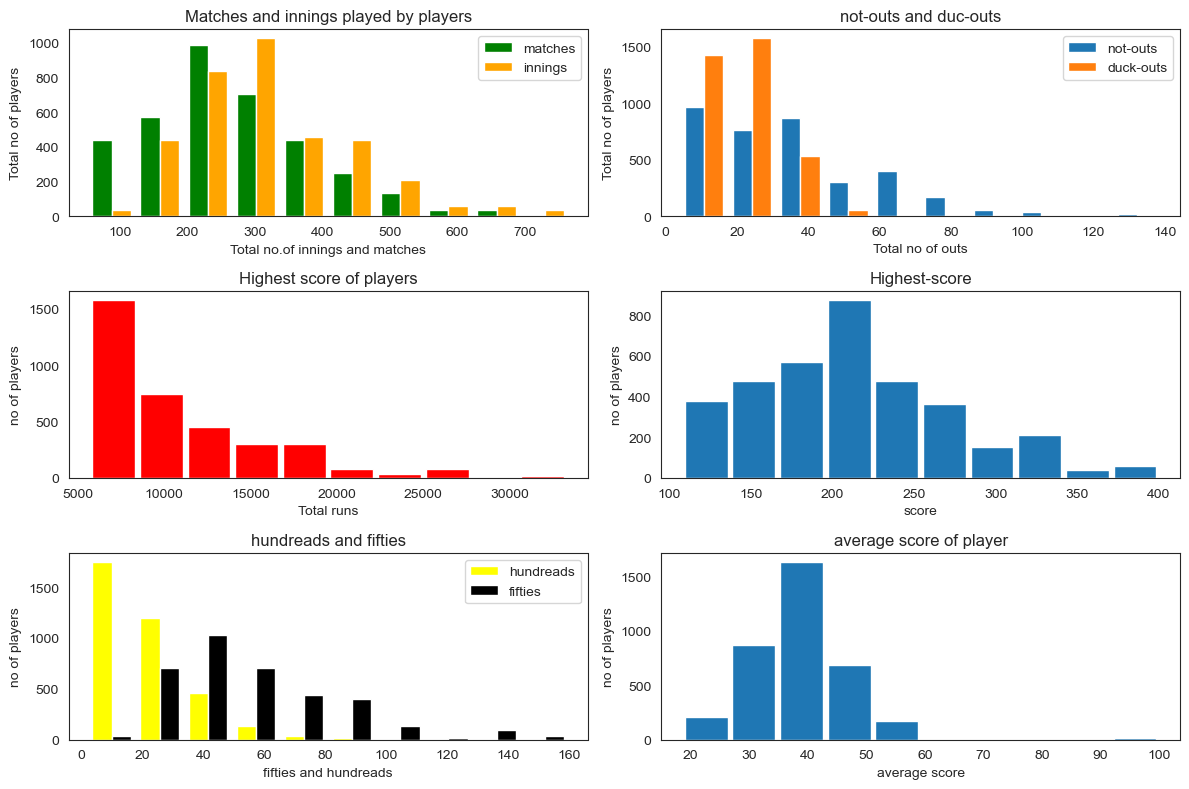

In [155]:
fig, ax = plt.subplots(3, 2, figsize=(12,8))

ax[0, 0].set_xlabel("Total no.of innings and matches")
ax[0, 0].set_ylabel("Total no of players")
ax[0, 0].set_title("Matches and innings played by players")
ax[0, 0].hist(data[["matches_played","innings"]],rwidth=0.8,color=["green","orange"],label=["matches","innings"])
ax[0, 0].legend()

ax[0, 1].set_xlabel("Total no of outs")
ax[0, 1].set_ylabel("Total no of players")
ax[0, 1].set_title("not-outs and duc-outs")
ax[0, 1].hist(data[["not_outs","ducks"]],rwidth=0.8,label=["not-outs","duck-outs"])
ax[0, 1].legend()

ax[1, 0].set_xlabel("Total runs")
ax[1, 0].set_ylabel("no of players")
ax[1, 0].set_title("Highest score of players")
ax[1, 0].hist(data["total_runs"],rwidth=0.9,color="red")

ax[1, 1].set_xlabel("score")
ax[1, 1].set_ylabel("no of players")
ax[1, 1].set_title("Highest-score")
ax[1, 1].hist(data["highest_score"],rwidth=0.9)

ax[2, 0].set_xlabel("fifties and hundreads")
ax[2, 0].set_ylabel("no of players")
ax[2, 0].set_title("hundreads and fifties")
ax[2, 0].hist(data[["hundreads","fifties"]],rwidth=0.8,color=["yellow","black"],label=["hundreads","fifties"])
ax[2, 0].legend()

ax[2, 1].set_xlabel("average score")
ax[2, 1].set_ylabel("no of players")
ax[2, 1].set_title("average score of player")
ax[2, 1].hist(data["average"],rwidth=0.9)

plt.tight_layout()
plt.show()


- from the above histogram the matches played by a player is less than the innings played.
- the range of matches end at 650 and innings continued till 750.
- from the above histogram the range of not-outs is higher than duck outs.
- below 1000 players are not out more than 5 times.
- more than 20 times above 1400 players are duck-outs
- from the above graph there are less no of players whos total runs is grater than 30000.
- highest no of players whos score is grater than 5000 and less than 7000.
- the high score of an individual players is 400 but more players whose highest score is more than 200
- most players scored 100 and less no of players scored 50 compared to hundreads.
- most no of times players out at 50.
- the average score of each player is 40.

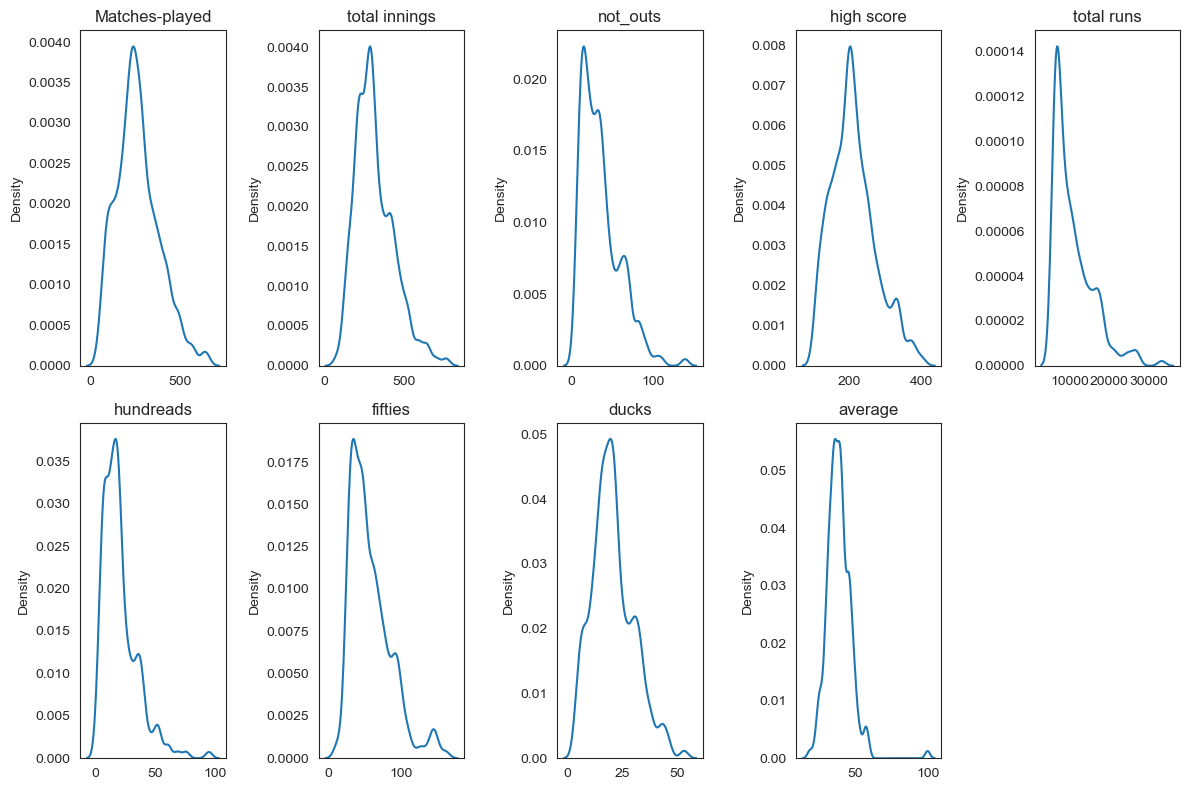

In [124]:


plt.figure(figsize=(12,8))

plt.subplot(2,5,1)
matches = data["matches_played"]
plt.title('Matches-played')
sns.set_style('white')
sns.kdeplot(np.array(matches))

plt.subplot(2,5,2)
innings = data["innings"]
plt.title('total innings')
sns.set_style('white')
sns.kdeplot(np.array(innings))

plt.subplot(2,5,3)
not_outs= data["not_outs"]
plt.title('not_outs')
sns.set_style('white')
sns.kdeplot(np.array(not_outs))

plt.subplot(2,5,4)
highest_score= data["highest_score"]
plt.title('high score')
sns.set_style('white')
sns.kdeplot(np.array(highest_score))

plt.subplot(2,5,5)
total_runs= data["total_runs"]
plt.title('total runs')
sns.set_style('white')
sns.kdeplot(np.array(total_runs))

plt.subplot(2,5,6)
hundreads= data["hundreads"]
plt.title('hundreads')
sns.set_style('white')
sns.kdeplot(np.array(hundreads))

plt.subplot(2,5,7)
fifties= data["fifties"]
plt.title('fifties')
sns.set_style('white')
sns.kdeplot(np.array(fifties))

plt.subplot(2,5,8)
ducks= data["ducks"]
plt.title('ducks')
sns.set_style('white')
sns.kdeplot(np.array(ducks))

plt.subplot(2,5,9)
average=data["average"]
plt.title("average")
sns.set_style("white")
sns.kdeplot(np.array(average))

plt.tight_layout()
plt.show()


### to represent the object(catagirical) columns i am using pie chart and bar plot

In [18]:
# finding the no of players in each country

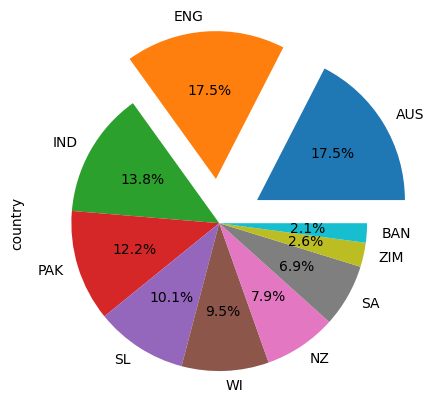

In [17]:

data["country"].value_counts().plot.pie(autopct="%.1f%%",explode=[0.3,0.3,0,0,0,0,0,0,0,0])
plt.show()

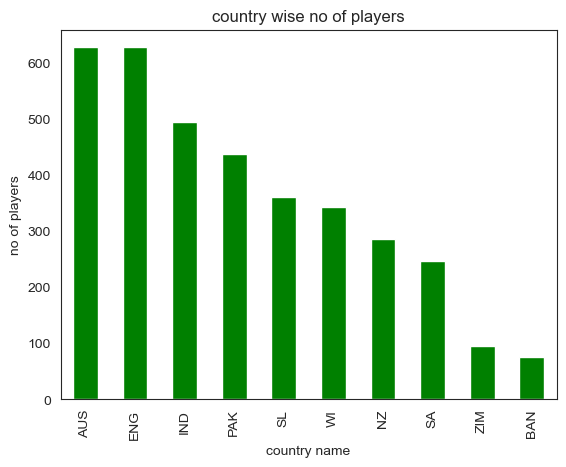

In [154]:
data["country"].value_counts().plot.bar(color="g")
plt.xlabel("country name")
plt.ylabel("no of players")
plt.title("country wise no of players")
plt.show()

- more no.of players from aus and eng  their performance is good .
- least no.of players from ban their performance is good.

# Bivariate analysis
- Bivariate analysis refers to the analysis of two variables to determine relationships between them.


In [68]:
data

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks
0,SR Tendulkar,IND,1989-2013,646,765,70,33299,248,47.91,95,160,34
1,KC Sangakkara,SL,2000-2015,571,644,63,27151,319,46.73,61,148,27
2,RT Ponting,AUS,1995-2012,542,653,69,26844,257,45.96,69,143,39
3,V Kohli,IND,2008-2023,478,591,80,26479,254,51.81,76,139,39
4,DPMD Jayawardene,SL,1997-2015,629,704,59,25024,374,38.79,52,129,46
...,...,...,...,...,...,...,...,...,...,...,...,...
3586,A Jadeja,IND,1992-2000,205,198,37,5726,119,35.56,6,31,11
3587,DA Miller,SA,2010-2022,245,217,72,5724,139,39.47,7,27,9
3588,AH Jones,NZ,1987-1995,126,161,17,5706,186,39.62,7,36,6
3589,JO Holder,WI,2013-2022,224,284,53,5697,202,24.66,3,25,30


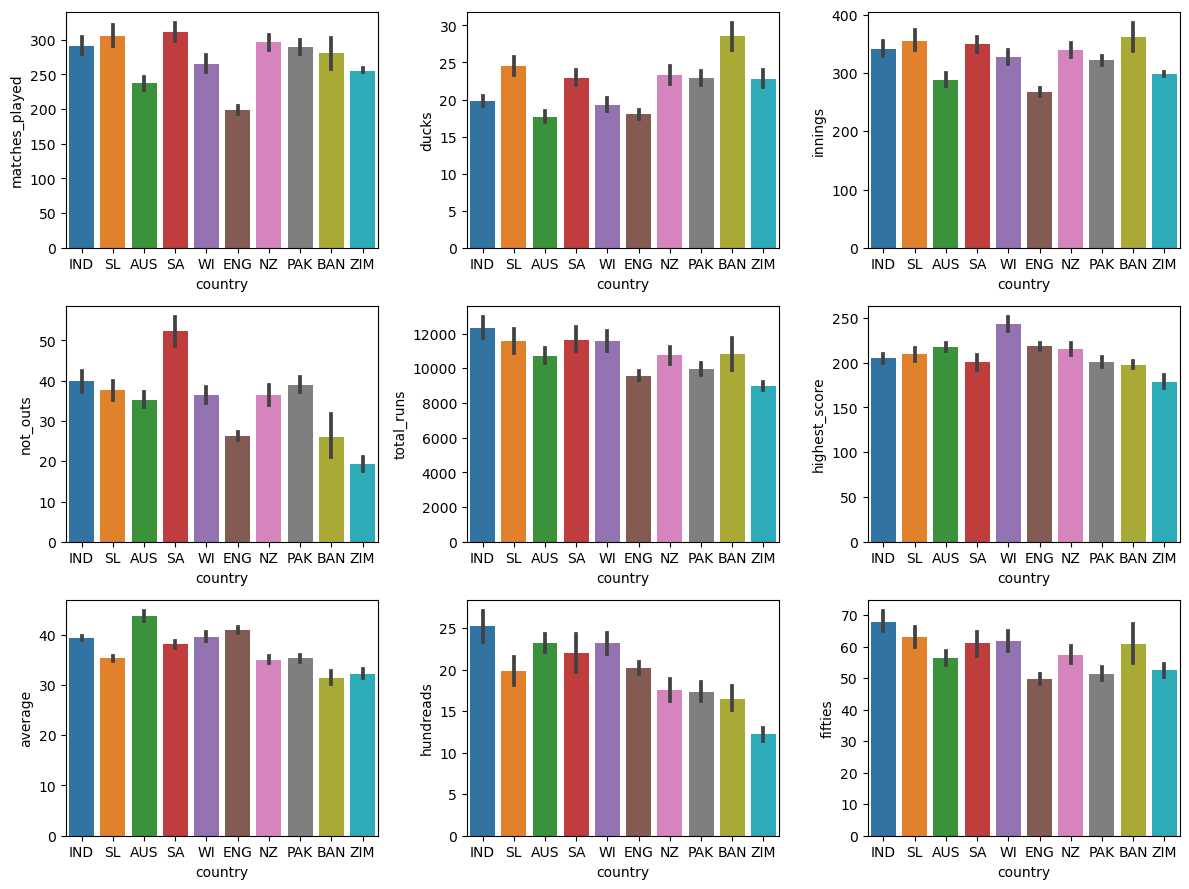

In [57]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(12, 9))
sns.barplot(x=data["country"],y=data["matches_played"], ax=axs[0,0])
sns.barplot(x=data["country"],y=data["ducks"], ax=axs[0,1])
sns.barplot(x=data["country"],y=data["innings"], ax=axs[0,2])
sns.barplot(x=data["country"],y=data["not_outs"], ax=axs[1,0])
sns.barplot(x=data["country"],y=data["total_runs"], ax=axs[1,1])
sns.barplot(x=data["country"],y=data["highest_score"], ax=axs[1,2])
sns.barplot(x=data["country"],y=data["average"], ax=axs[2,0])
sns.barplot(x=data["country"],y=data["hundreads"], ax=axs[2,1])
sns.barplot(x=data["country"],y=data["fifties"], ax=axs[2,2])
plt.tight_layout()
plt.show()


- more no of matches played by sa team player,least matches by eng player.
- most time got ducked players from ban and least from team aus and england.
- most no of innings played by ban players and least by eng.
- players of south africa ha most no of players are not out more than 50 times and least from zim.
- total carrier runs of indian players is high and zim players runs is low.
- player of westindies scored high score in an inning and least by zim.
- the average score of the aus players is high and ban is low.
- player of india has scored more no of hundreads,zim is the least.
- player of india has scored more no of fifties,eng is the least.

-if we see that in all the factors zim is at last position and compared to other countries india is top in 4 factors 
so india has best players

In [165]:
# finding the best player and average player from the world

In [9]:
sorteddata=data.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"],ascending=False)

In [10]:
# top 10 players in the world 
sorteddata.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks
0,SR Tendulkar,IND,1989-2013,646,765,70,33299,248,47.91,95,160,34
1,KC Sangakkara,SL,2000-2015,571,644,63,27151,319,46.73,61,148,27
2,RT Ponting,AUS,1995-2012,542,653,69,26844,257,45.96,69,143,39
3,V Kohli,IND,2008-2023,478,591,80,26479,254,51.81,76,139,39
4,DPMD Jayawardene,SL,1997-2015,629,704,59,25024,374,38.79,52,129,46
5,JH Kallis,SA,1995-2014,495,596,91,24735,224,48.98,61,144,33
6,R Dravid,IND,1996-2012,487,586,65,23568,270,45.23,46,144,20
7,BC Lara,WI,1990-2007,419,510,37,22033,400,46.58,52,109,31
8,JE Root,ENG,2012-2022,310,484,53,21282,254,49.37,55,111,29
9,S Chanderpaul,WI,1994-2015,438,540,89,20445,203,45.33,39,123,20


- the best player in all the formats is from india that is sachin-tendulkar.

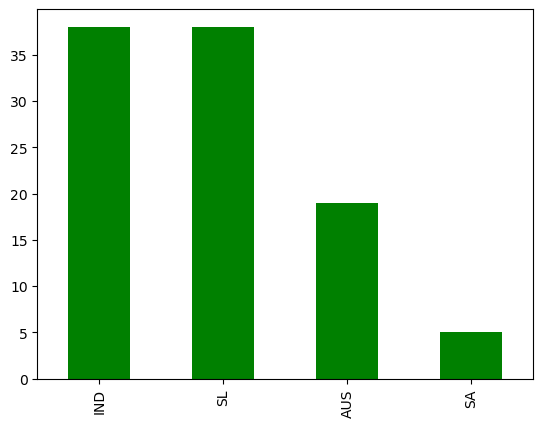

In [13]:
# counting the no of best players from the country wise
sorteddata["country"].head(100).value_counts().plot.bar(color="green")
plt.show()

- all countries has equal no of best players

In [ ]:
# finding the average players from all over the worl

In [159]:
sorteddata1=data.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"])

In [160]:
# top 10 average players.
sorteddata1.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks
188,RP Arnold,SL,1997-2007,219,221,44,5687,123,32.12,4,38,14
187,JO Holder,WI,2013-2022,224,284,53,5697,202,24.66,3,25,30
186,AH Jones,NZ,1987-1995,126,161,17,5706,186,39.62,7,36,6
185,DA Miller,SA,2010-2022,245,217,72,5724,139,39.47,7,27,9
184,A Jadeja,IND,1992-2000,205,198,37,5726,119,35.56,6,31,11
183,JB Hobbs,ENG,1908-1930,61,111,8,5797,211,56.28,16,31,4
182,DCS Compton,ENG,1937-1957,78,131,15,5807,278,50.06,17,28,10
181,KD Walters,AUS,1965-1981,102,149,20,5870,250,45.50,15,35,5
180,Moin Khan,PAK,1990-2004,284,284,47,5899,137,24.89,4,26,22
179,N Dickwella,SL,2014-2022,136,208,12,5901,116,30.10,2,42,7


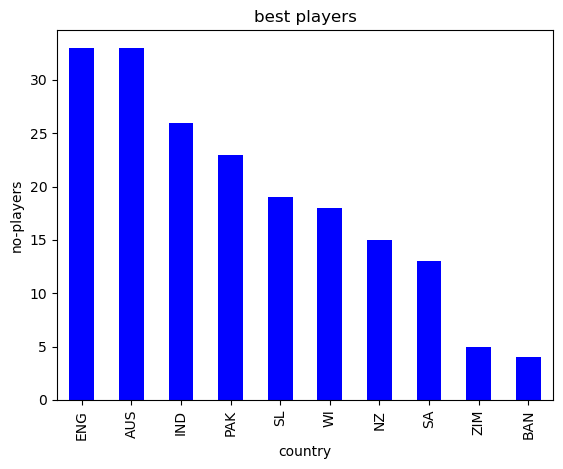

In [161]:
avg_players=sorteddata1.drop_duplicates()["country"].value_counts().plot.bar(color="b")
plt.xlabel("country")
plt.ylabel("no-players")
plt.title("best players")
plt.show()

- there are  most no of average players from the aus and eng and least from ban

# Analysing the country wise


In [10]:
# grouping by country wise 
a=data.groupby("country")

In [11]:
a.ngroups

10

# INDIA

In [12]:
# analysing the indian team.

In [55]:
india=a.get_group("IND")


In [56]:
india


,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks,starting_year,ending_year
0,SR Tendulkar,IND,1989-2013,646,765,70,33299,248,47.91,95,160,34,1989,2013
3,V Kohli,IND,2008-2023,478,591,80,26479,254,51.81,76,139,39,2008,2023
6,R Dravid,IND,1996-2012,487,586,65,23568,270,45.23,46,144,20,1996,2012
17,RG Sharma,IND,2007-2023,420,474,60,17888,264,43.20,46,90,27,2007,2023
19,SC Ganguly,IND,1992-2008,405,470,36,17507,239,40.33,34,101,29,1992,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,GR Viswanath,IND,1969-1983,115,178,11,6519,222,39.03,14,37,11,1969,1983
3566,M Amarnath,IND,1969-1989,153,188,22,6302,138,37.96,13,37,14,1969,1989
3571,K Srikkanth,IND,1981-1992,189,217,7,6153,123,29.30,6,39,18,1981,1992
3579,RR Pant,IND,2017-2022,126,186,20,5963,159,35.92,9,31,9,2017,2022


In [15]:
# plotting the bar plot.

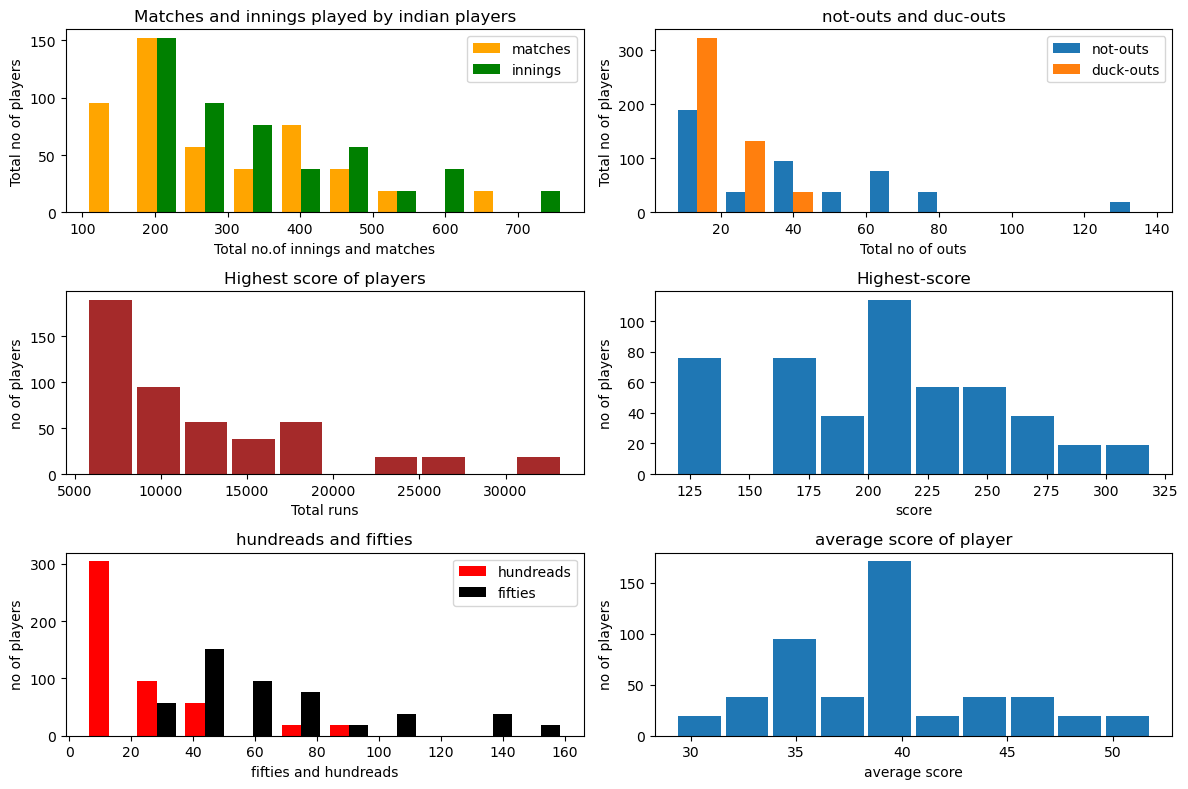

In [16]:
fig, ax = plt.subplots(3, 2, figsize=(12,8))

ax[0, 0].set_xlabel("Total no.of innings and matches")
ax[0, 0].set_ylabel("Total no of players")
ax[0, 0].set_title("Matches and innings played by indian players")
ax[0, 0].hist(india[["matches_played","innings"]],rwidth=0.8,color=["orange","green"],label=["matches","innings"])
ax[0, 0].legend()

ax[0, 1].set_xlabel("Total no of outs")
ax[0, 1].set_ylabel("Total no of players")
ax[0, 1].set_title("not-outs and duc-outs")
ax[0, 1].hist(india[["not_outs","ducks"]],rwidth=0.8,label=["not-outs","duck-outs"])
ax[0, 1].legend()

ax[1, 0].set_xlabel("Total runs")
ax[1, 0].set_ylabel("no of players")
ax[1, 0].set_title("Highest score of players")
ax[1, 0].hist(india["total_runs"],rwidth=0.9,color="brown")

ax[1, 1].set_xlabel("score")
ax[1, 1].set_ylabel("no of players")
ax[1, 1].set_title("Highest-score")
ax[1, 1].hist(india["highest_score"],rwidth=0.9)

ax[2, 0].set_xlabel("fifties and hundreads")
ax[2, 0].set_ylabel("no of players")
ax[2, 0].set_title("hundreads and fifties")
ax[2, 0].hist(india[["hundreads","fifties"]],rwidth=0.8,color=["red","black"],label=["hundreads","fifties"])
ax[2, 0].legend()

ax[2, 1].set_xlabel("average score")
ax[2, 1].set_ylabel("no of players")
ax[2, 1].set_title("average score of player")
ax[2, 1].hist(india["average"],rwidth=0.9)

plt.tight_layout()
plt.show()


- 200 innings and matches played players are high in india,highest no of innings  played by an indian player is more than 750.
- less than 20 players who got duck out more than 300 times,and less 200 times not-out,and more than 120 times indian players are not outs.
- there are 150+ players of india whos score is grater than 5000,and the highest score of indian players is 30000+.
- indian has more than 100 players whos highest score in an inning is 200+(less than 220),some players top score is grater than 300.
- india has more players who scored 100  less than 20 times,150+players scored 50 .
- the average score of more indian players is 40.

In [18]:
# sorting the column values to get top players based on the column vallues.
ind=india.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"],ascending=False)

In [149]:
# top 10 players from india
ind.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks
0,SR Tendulkar,IND,1989-2013,646,765,70,33299,248,47.91,95,160,34
3,V Kohli,IND,2008-2023,478,591,80,26479,254,51.81,76,139,39
6,R Dravid,IND,1996-2012,487,586,65,23568,270,45.23,46,144,20
17,RG Sharma,IND,2007-2023,420,474,60,17888,264,43.20,46,90,27
19,SC Ganguly,IND,1992-2008,405,470,36,17507,239,40.33,34,101,29
23,MS Dhoni,IND,2004-2019,523,516,139,16876,224,44.76,14,108,20
27,V Sehwag,IND,1999-2013,350,419,13,16463,319,40.54,37,67,30
32,M Azharuddin,IND,1984-2000,428,453,63,15503,199,39.75,29,78,14
48,SM Gavaskar,IND,1971-1987,232,315,29,13149,236,45.97,35,71,20
65,Yuvraj Singh,IND,2000-2017,381,374,47,11277,169,34.48,17,67,25


In [19]:
# top 10 average players from india.
ind.drop_duplicates().tail(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks
115,SK Raina,IND,2005-2018,315,288,48,7808,120,32.53,6,47,25
123,NS Sidhu,IND,1983-1999,184,202,10,7587,201,39.51,15,48,15
124,KL Rahul,IND,2014-2023,163,221,17,7569,199,37.10,17,48,15
142,RJ Shastri,IND,1981-1992,230,249,35,6938,206,32.42,15,30,14
151,RA Jadeja,IND,2009-2022,290,270,82,6580,175,35.00,5,38,14
155,GR Viswanath,IND,1969-1983,115,178,11,6519,222,39.03,14,37,11
164,M Amarnath,IND,1969-1989,153,188,22,6302,138,37.96,13,37,14
169,K Srikkanth,IND,1981-1992,189,217,7,6153,123,29.30,6,39,18
177,RR Pant,IND,2017-2022,126,186,20,5963,159,35.92,9,31,9
184,A Jadeja,IND,1992-2000,205,198,37,5726,119,35.56,6,31,11


<AxesSubplot:>

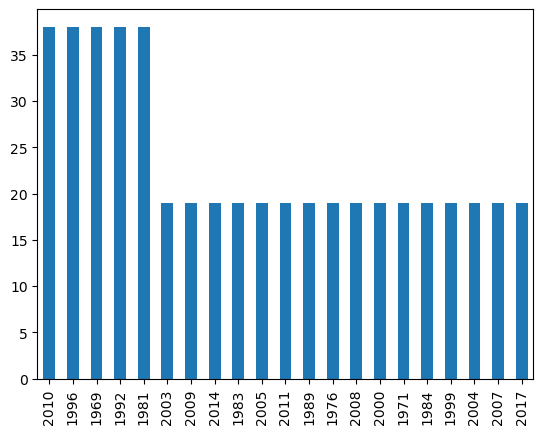

In [58]:
# finding the indian players carrier staring year.
india["starting_year"].value_counts().plot.bar()

- most of the players started their carrior in the year 2010,1996,1969,1992,1981.
- less and equal no of in the year 2017,2000,2008,2011,2005,2009.

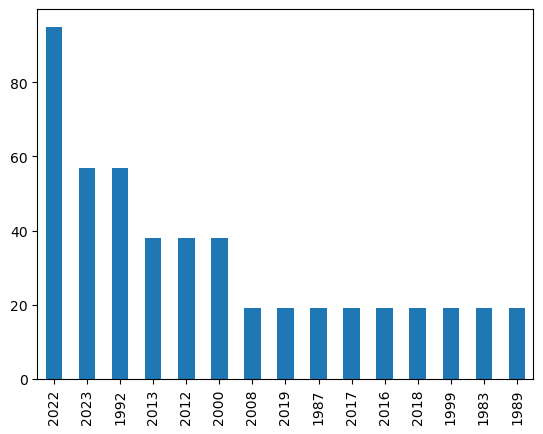

In [60]:
# indian players carrior ending years.
india["ending_year"].value_counts().plot.bar()
plt.show()

- most of the players ended their carrior in the year 2022.
- less and equal no of in the year 1989,1999,2019,2000,2012,2017.

 # AUSTRALIA 

In [53]:
# analysing the australia team.

In [61]:
australia=a.get_group("AUS")

In [62]:
australia

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks,starting_year,ending_year
2,RT Ponting,AUS,1995-2012,542,653,69,26844,257,45.96,69,143,39,1995,2012
11,DA Warner,AUS,2009-2023,334,474,27,19031,335,42.57,49,93,26,2009,2023
14,SR Waugh,AUS,1985-2004,491,546,103,18365,200,41.45,35,94,37,1985,2004
18,AR Border,AUS,1978-1994,428,516,83,17673,205,40.81,30,102,22,1978,1994
20,SPD Smith,AUS,2010-2023,288,389,50,17406,239,51.34,52,83,18,2010,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3572,RN Harvey,AUS,1948-1963,79,137,10,6149,205,48.41,21,24,7,1948,1963
3574,IA Healy,AUS,1988-1999,286,301,59,6103,161,25.21,4,26,27,1988,1999
3576,IM Chappell,AUS,1964-1980,91,152,12,6018,196,42.98,14,34,11,1964,1980
3580,TM Head,AUS,2016-2023,100,155,13,5947,175,41.88,13,33,8,2016,2023


In [ ]:
# plotting the bar plot

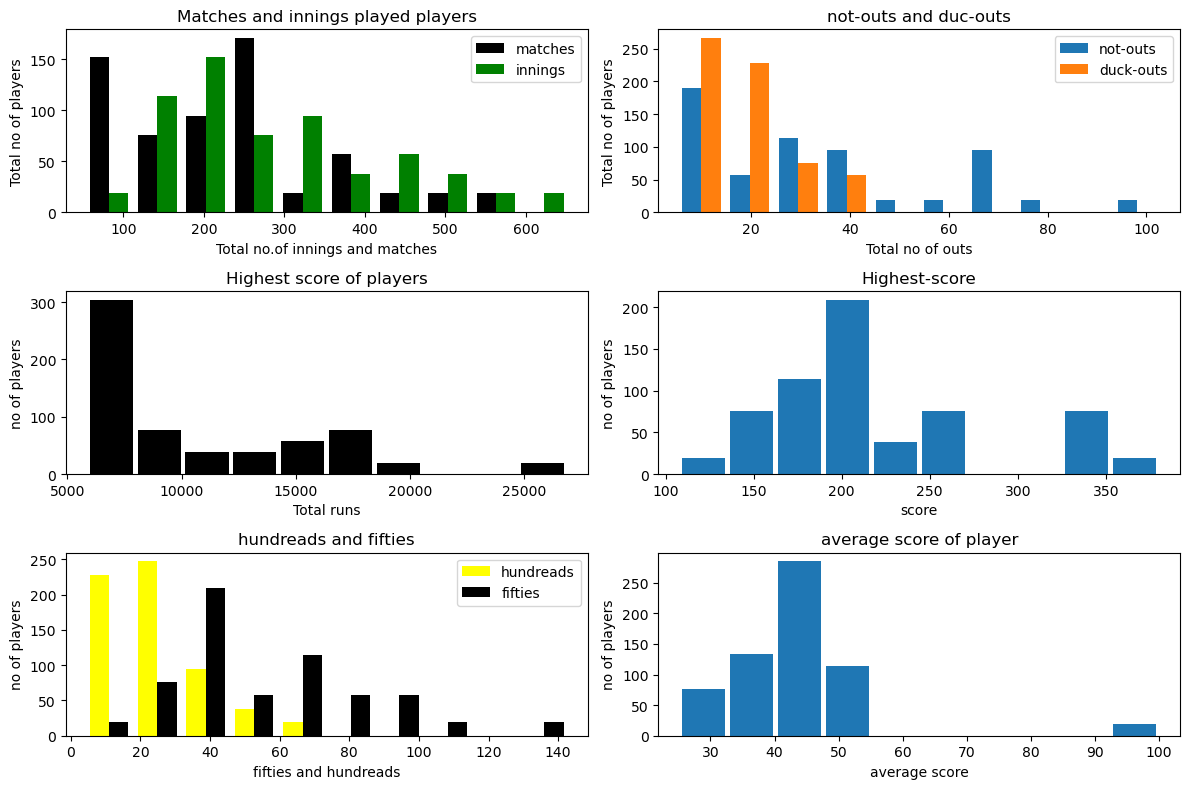

In [13]:
fig, ax = plt.subplots(3, 2, figsize=(12,8))

ax[0, 0].set_xlabel("Total no.of innings and matches")
ax[0, 0].set_ylabel("Total no of players")
ax[0, 0].set_title("Matches and innings played players")
ax[0, 0].hist(australia[["matches_played","innings"]],rwidth=0.8,color=["black","green"],label=["matches","innings"])
ax[0, 0].legend()

ax[0, 1].set_xlabel("Total no of outs")
ax[0, 1].set_ylabel("Total no of players")
ax[0, 1].set_title("not-outs and duc-outs")
ax[0, 1].hist(australia[["not_outs","ducks"]],rwidth=0.8,label=["not-outs","duck-outs"])
ax[0, 1].legend()

ax[1, 0].set_xlabel("Total runs")
ax[1, 0].set_ylabel("no of players")
ax[1, 0].set_title("Highest score of players")
ax[1, 0].hist(australia["total_runs"],rwidth=0.9,color="black")

ax[1, 1].set_xlabel("score")
ax[1, 1].set_ylabel("no of players")
ax[1, 1].set_title("Highest-score")
ax[1, 1].hist(australia["highest_score"],rwidth=0.9)

ax[2, 0].set_xlabel("fifties and hundreads")
ax[2, 0].set_ylabel("no of players")
ax[2, 0].set_title("hundreads and fifties")
ax[2, 0].hist(australia[["hundreads","fifties"]],rwidth=0.8,color=["yellow","black"],label=["hundreads","fifties"])
ax[2, 0].legend()

ax[2, 1].set_xlabel("average score")
ax[2, 1].set_ylabel("no of players")
ax[2, 1].set_title("average score of player")
ax[2, 1].hist(australia["average"],rwidth=0.9)

plt.tight_layout()
plt.show()


In [20]:
# sorting the column values to get top players based on the column vallues.
aus=australia.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"],ascending=False)

In [21]:
# top 10 best players from australia
aus.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks
2,RT Ponting,AUS,1995-2012,542,653,69,26844,257,45.96,69,143,39
11,DA Warner,AUS,2009-2023,334,474,27,19031,335,42.57,49,93,26
14,SR Waugh,AUS,1985-2004,491,546,103,18365,200,41.45,35,94,37
18,AR Border,AUS,1978-1994,428,516,83,17673,205,40.81,30,102,22
20,SPD Smith,AUS,2010-2023,288,389,50,17406,239,51.34,52,83,18
26,MJ Clarke,AUS,2003-2015,379,438,68,16794,329,45.38,36,84,20
28,ME Waugh,AUS,1988-2002,370,443,37,16332,173,40.22,37,96,35
37,AC Gilchrist,AUS,1996-2008,382,414,31,14852,204,38.77,32,78,33
40,ML Hayden,AUS,1993-2009,262,338,31,14583,380,47.50,39,66,23
46,DC Boon,AUS,1984-1996,288,367,36,13386,200,40.44,26,69,22


In [22]:
# top 10 average players of australia.
aus.drop_duplicates().tail(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks
146,BJ Haddin,AUS,2001-2015,223,256,35,6735,169,30.47,6,33,12
148,A Symonds,AUS,1998-2009,229,206,39,6669,162,39.93,8,41,21
157,GJ Maxwell,AUS,2012-2022,227,229,31,6393,145,32.28,7,36,12
160,KJ Hughes,AUS,1977-1985,166,211,11,6356,213,31.78,9,39,22
165,MJ Slater,AUS,1993-2001,116,173,8,6299,219,38.17,14,30,12
170,RN Harvey,AUS,1948-1963,79,137,10,6149,205,48.41,21,24,7
172,IA Healy,AUS,1988-1999,286,301,59,6103,161,25.21,4,26,27
174,IM Chappell,AUS,1964-1980,91,152,12,6018,196,42.98,14,34,11
178,TM Head,AUS,2016-2023,100,155,13,5947,175,41.88,13,33,8
181,KD Walters,AUS,1965-1981,102,149,20,5870,250,45.50,15,35,5


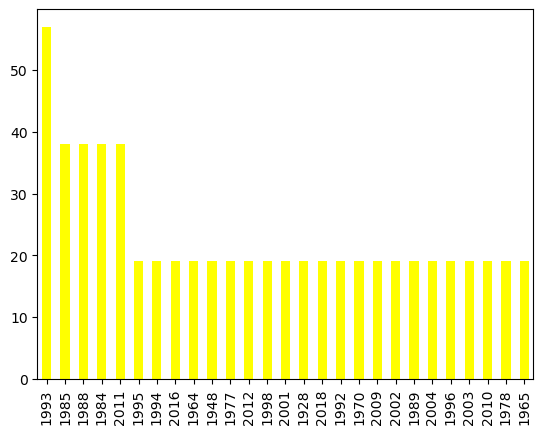

In [65]:
australia["starting_year"].value_counts().plot.bar(color="yellow")
plt.show()

- most players staeted their carrior in the years 1993
- less and equal no of in the year 1965,2010,2004,2009,2018.

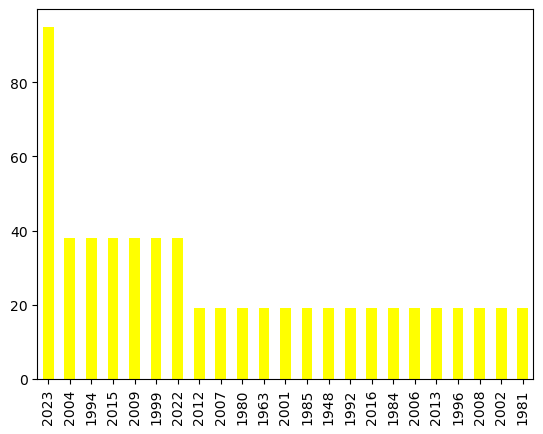

In [66]:
australia["ending_year"].value_counts().plot.bar(color="yellow")
plt.show()

- most players ended their carrior in the years 2023.
- less and equal no of in the year 1981,2002,2008,1992,2001

# PAKISTAN

In [68]:
# analysing the pakistan team
pak=a.get_group("PAK")

In [69]:
pak

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks,starting_year,ending_year
21,Younis Khan,PAK,2000-2017,391,476,43,17177,313,39.66,40,79,42,2000,2017
25,Mohammad Yousuf,PAK,1998-2010,365,419,50,16808,223,45.55,39,92,26,1998,2010
29,Javed Miandad,PAK,1975-1996,354,408,62,16280,280,47.05,31,94,14,1975,1996
36,Babar Azam,PAK,2015-2023,228,319,40,14870,196,53.29,42,94,16,2015,2023
52,Saleem Malik,PAK,1982-1999,381,409,60,12934,237,37.06,20,76,30,1982,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Wasim Akram,PAK,1984-2003,452,425,72,6563,257,18.59,3,13,45,1984,2003
3556,Kamran Akmal,PAK,2002-2017,256,273,26,6551,158,26.52,11,24,31,2002,2017
3561,Asad Shafiq,PAK,2010-2020,142,201,10,6361,137,33.30,12,38,19,2010,2020
3570,Sarfaraz Ahmed,PAK,2007-2023,218,218,44,6228,118,35.79,6,37,6,2007,2023


In [27]:
# plotting the bar plot


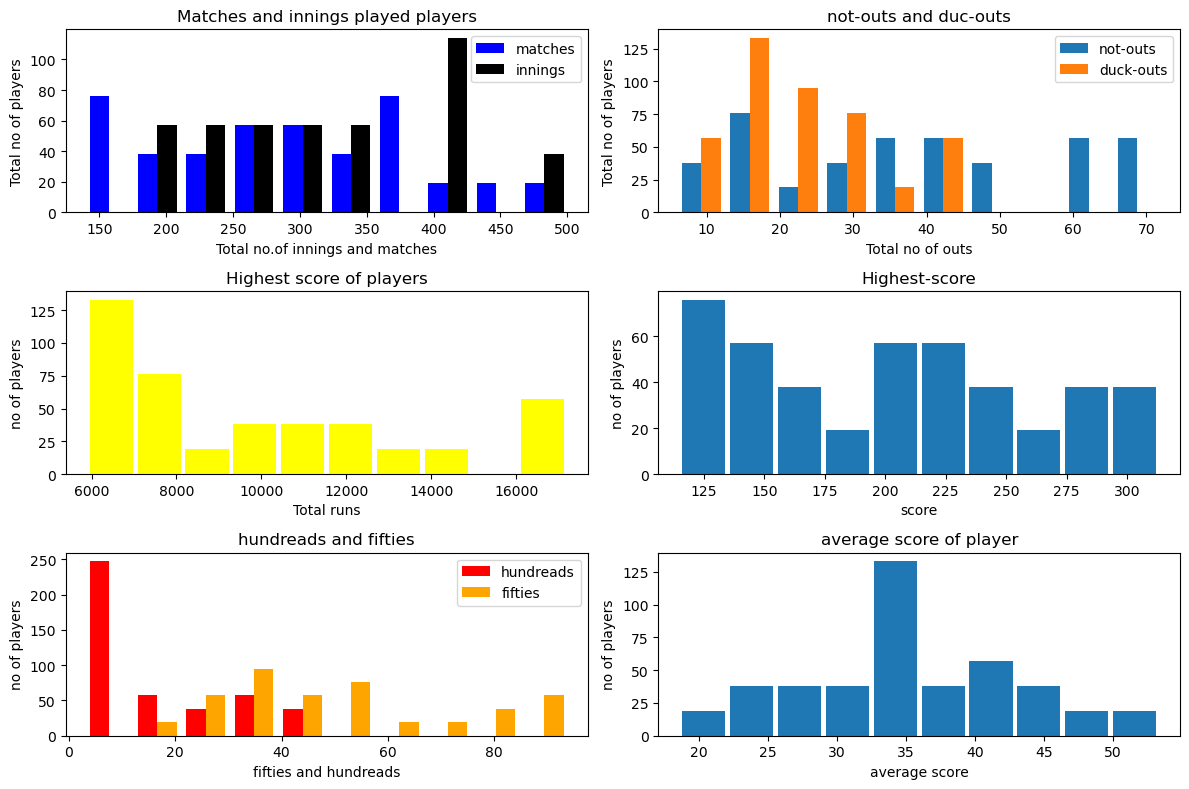

In [37]:
fig, ax = plt.subplots(3, 2, figsize=(12,8))

ax[0, 0].set_xlabel("Total no.of innings and matches")
ax[0, 0].set_ylabel("Total no of players")
ax[0, 0].set_title("Matches and innings played players")
ax[0, 0].hist(pak[["matches_played","innings"]],rwidth=0.8,color=["blue","black"],label=["matches","innings"])
ax[0, 0].legend()

ax[0, 1].set_xlabel("Total no of outs")
ax[0, 1].set_ylabel("Total no of players")
ax[0, 1].set_title("not-outs and duc-outs")
ax[0, 1].hist(pak[["not_outs","ducks"]],rwidth=0.8,label=["not-outs","duck-outs"])
ax[0, 1].legend()

ax[1, 0].set_xlabel("Total runs")
ax[1, 0].set_ylabel("no of players")
ax[1, 0].set_title("Highest score of players")
ax[1, 0].hist(pak["total_runs"],rwidth=0.9,color="yellow")

ax[1, 1].set_xlabel("score")
ax[1, 1].set_ylabel("no of players")
ax[1, 1].set_title("Highest-score")
ax[1, 1].hist(pak["highest_score"],rwidth=0.9)

ax[2, 0].set_xlabel("fifties and hundreads")
ax[2, 0].set_ylabel("no of players")
ax[2, 0].set_title("hundreads and fifties")
ax[2, 0].hist(pak[["hundreads","fifties"]],rwidth=0.8,color=["red","orange"],label=["hundreads","fifties"])
ax[2, 0].legend()

ax[2, 1].set_xlabel("average score")
ax[2, 1].set_ylabel("no of players")
ax[2, 1].set_title("average score of player")
ax[2, 1].hist(pak["average"],rwidth=0.9)

plt.tight_layout()
plt.show()


In [31]:
# sorting the column values to get top players based on the column vallues.
pakistan=pak.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"],ascending=False)

In [32]:
# top 10 best players of pakistan
pakistan.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks
21,Younis Khan,PAK,2000-2017,391,476,43,17177,313,39.66,40,79,42
25,Mohammad Yousuf,PAK,1998-2010,365,419,50,16808,223,45.55,39,92,26
29,Javed Miandad,PAK,1975-1996,354,408,62,16280,280,47.05,31,94,14
36,Babar Azam,PAK,2015-2023,228,319,40,14870,196,53.29,42,94,16
52,Saleem Malik,PAK,1982-1999,381,409,60,12934,237,37.06,20,76,30
54,Saeed Anwar,PAK,1989-2003,292,325,18,12603,194,41.05,31,67,22
56,Mohammad Hafeez,PAK,2003-2021,377,414,34,12385,224,32.59,20,63,33
68,Shoaib Malik,PAK,1999-2021,420,405,71,11073,245,33.15,11,56,22
72,Shahid Afridi,PAK,1996-2016,501,488,38,10896,156,24.21,11,50,43
79,Azhar Ali,PAK,2010-2022,147,268,17,10252,302,40.84,25,51,28


In [33]:
# top 10 average players of pakistan
pakistan.drop_duplicates().tail(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks
125,Aamer Sohail,PAK,1990-2000,200,235,7,7538,205,33.06,10,43,16
126,Imran Khan,PAK,1971-1992,262,278,65,7518,136,35.29,7,37,14
133,Abdul Razzaq,PAK,1996-2013,327,321,72,7201,134,28.91,6,30,19
144,Mudassar Nazar,PAK,1976-1989,197,232,18,6769,231,31.63,10,33,13
147,Mohammad Rizwan,PAK,2015-2023,153,209,35,6704,115,38.52,7,46,11
153,Wasim Akram,PAK,1984-2003,452,425,72,6563,257,18.59,3,13,45
154,Kamran Akmal,PAK,2002-2017,256,273,26,6551,158,26.52,11,24,31
159,Asad Shafiq,PAK,2010-2020,142,201,10,6361,137,33.30,12,38,19
168,Sarfaraz Ahmed,PAK,2007-2023,218,218,44,6228,118,35.79,6,37,6
180,Moin Khan,PAK,1990-2004,284,284,47,5899,137,24.89,4,26,22


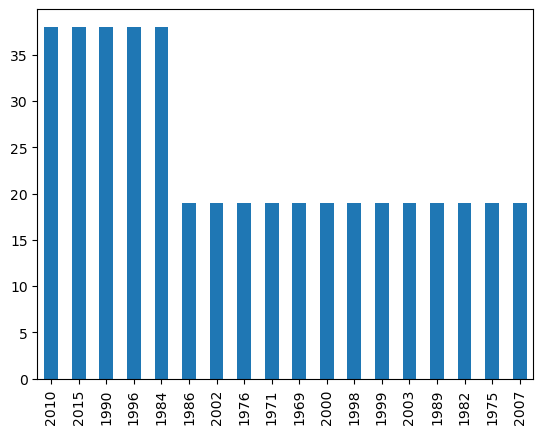

In [74]:
pak["starting_year"].value_counts().plot.bar()
plt.show()

- most players started their carrior in the year 2010,2015,1996,1984.
- less and equal no of in the years 1969,2007,1975,1982,2003

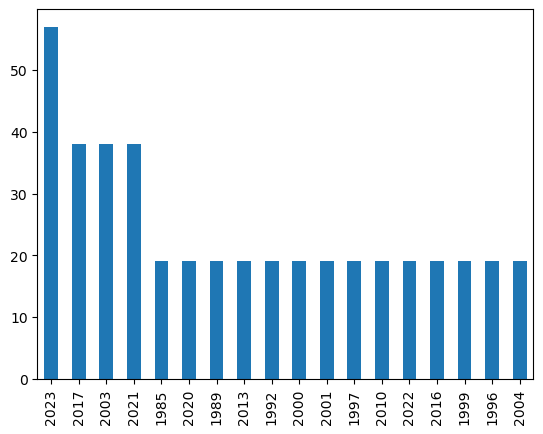

In [73]:
pak["ending_year"].value_counts().plot.bar()
plt.show()

- most players ended their carrior in the year 2023.
- less and equal no of players in 2010,1996,2004,2001,2013.

# ENGLAND

In [14]:
# analysing the england team
eng=a.get_group("ENG")

In [15]:
eng

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks,starting_year,ending_year
8,JE Root,ENG,2012-2022,310,484,53,21282,254,49.37,55,111,29,2012,2022
31,AN Cook,ENG,2006-2018,256,386,20,15693,294,42.87,38,76,16,2006,2018
44,KP Pietersen,ENG,2004-2014,267,333,28,13546,227,44.41,32,65,18,2004,2014
47,GA Gooch,ENG,1975-1995,242,336,11,13169,333,40.52,28,69,17,1975,1995
49,AJ Stewart,ENG,1989-2003,298,393,35,13029,190,36.39,19,72,27,1989,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554,IJL Trott,ENG,2007-2015,123,161,17,6569,226,45.61,13,39,12,2007,2015
3558,MW Gatting,ENG,1977-1995,171,226,31,6504,207,33.35,11,30,20,1977,1995
3578,MM Ali,ENG,2014-2022,247,273,36,5985,155,25.25,7,26,30,2014,2022
3584,DCS Compton,ENG,1937-1957,78,131,15,5807,278,50.06,17,28,10,1937,1957


In [39]:
# plotting the bar plot

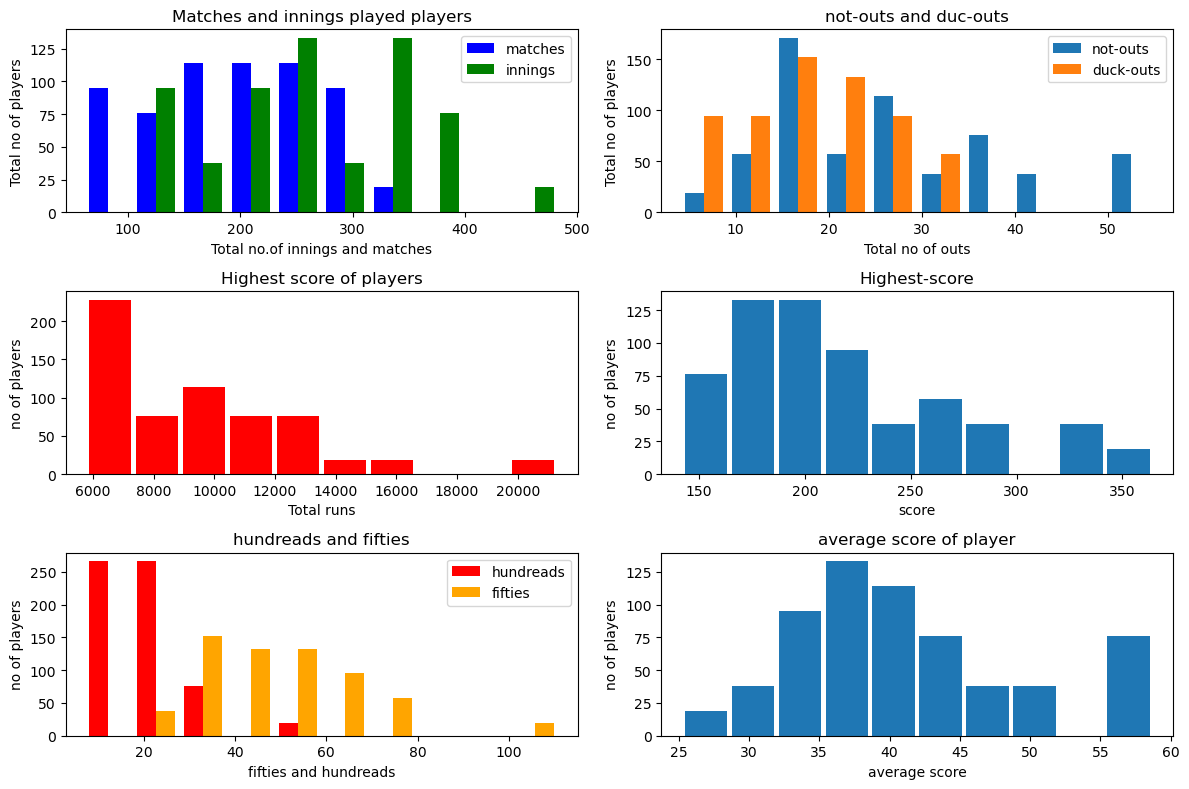

In [41]:
fig, ax = plt.subplots(3, 2, figsize=(12,8))

ax[0, 0].set_xlabel("Total no.of innings and matches")
ax[0, 0].set_ylabel("Total no of players")
ax[0, 0].set_title("Matches and innings played players")
ax[0, 0].hist(eng[["matches_played","innings"]],rwidth=0.8,color=["blue","green"],label=["matches","innings"])
ax[0, 0].legend()

ax[0, 1].set_xlabel("Total no of outs")
ax[0, 1].set_ylabel("Total no of players")
ax[0, 1].set_title("not-outs and duc-outs")
ax[0, 1].hist(eng[["not_outs","ducks"]],rwidth=0.8,label=["not-outs","duck-outs"])
ax[0, 1].legend()

ax[1, 0].set_xlabel("Total runs")
ax[1, 0].set_ylabel("no of players")
ax[1, 0].set_title("Highest score of players")
ax[1, 0].hist(eng["total_runs"],rwidth=0.9,color="red")

ax[1, 1].set_xlabel("score")
ax[1, 1].set_ylabel("no of players")
ax[1, 1].set_title("Highest-score")
ax[1, 1].hist(eng["highest_score"],rwidth=0.9)

ax[2, 0].set_xlabel("fifties and hundreads")
ax[2, 0].set_ylabel("no of players")
ax[2, 0].set_title("hundreads and fifties")
ax[2, 0].hist(eng[["hundreads","fifties"]],rwidth=0.8,color=["red","orange"],label=["hundreads","fifties"])
ax[2, 0].legend()

ax[2, 1].set_xlabel("average score")
ax[2, 1].set_ylabel("no of players")
ax[2, 1].set_title("average score of player")
ax[2, 1].hist(eng["average"],rwidth=0.9)

plt.tight_layout()
plt.show()


In [42]:
# sorting the column values to get top players based on the column vallues.
england=eng.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"],ascending=False)

In [43]:
# top 10 best players of england
england.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks
8,JE Root,ENG,2012-2022,310,484,53,21282,254,49.37,55,111,29
31,AN Cook,ENG,2006-2018,256,386,20,15693,294,42.87,38,76,16
44,KP Pietersen,ENG,2004-2014,267,333,28,13546,227,44.41,32,65,18
47,GA Gooch,ENG,1975-1995,242,336,11,13169,333,40.52,28,69,17
49,AJ Stewart,ENG,1989-2003,298,393,35,13029,190,36.39,19,72,27
50,IR Bell,ENG,2004-2015,278,361,38,12952,235,40.09,26,78,20
57,JM Bairstow,ENG,2011-2022,242,353,34,12341,167,38.68,30,49,33
61,BA Stokes,ENG,2011-2022,234,355,36,11596,258,36.35,21,61,23
64,DI Gower,ENG,1978-1992,230,315,26,11401,215,39.44,25,51,13
67,AJ Strauss,ENG,2003-2012,227,304,14,11128,177,38.37,27,52,25


In [44]:
# top 10 average players of england
england.drop_duplicates().tail(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks
135,A Flintoff,ENG,1998-2009,217,251,26,7100,167,31.55,8,44,26
136,GA Hick,ENG,1991-2001,183,230,19,7064,178,33.47,10,44,21
140,L Hutton,ENG,1937-1955,79,138,15,6971,364,56.67,19,33,5
143,KF Barrington,ENG,1955-1968,82,131,15,6806,256,58.67,20,35,5
149,RA Smith,ENG,1988-1996,133,182,23,6655,175,41.85,13,43,12
152,IJL Trott,ENG,2007-2015,123,161,17,6569,226,45.61,13,39,12
156,MW Gatting,ENG,1977-1995,171,226,31,6504,207,33.35,11,30,20
176,MM Ali,ENG,2014-2022,247,273,36,5985,155,25.25,7,26,30
182,DCS Compton,ENG,1937-1957,78,131,15,5807,278,50.06,17,28,10
183,JB Hobbs,ENG,1908-1930,61,111,8,5797,211,56.28,16,31,4


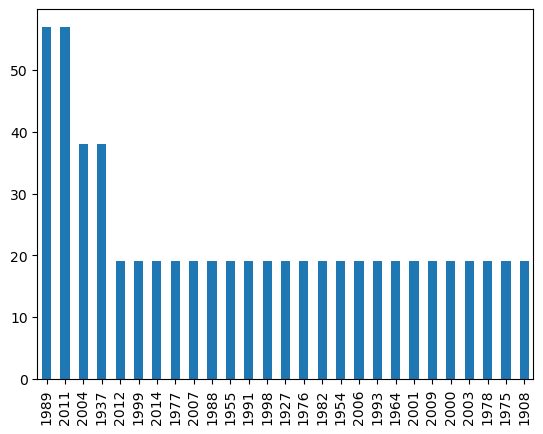

In [17]:
eng["starting_year"].value_counts().plot.bar()
plt.show()

- most players started their carrior in the year 1989 2011.
- less and equal no of in 1908,1982, 2007,2014,2006.

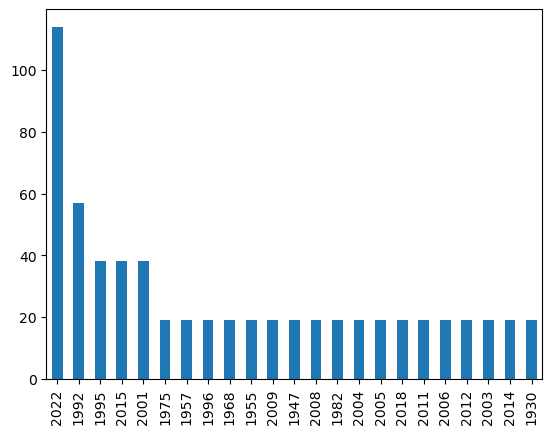

In [18]:
eng["ending_year"].value_counts().plot.bar()
plt.show()

- most of the players has ended their carrior in the year 2022.
- less and equal no of in 1930,2014,1982,1996,1968

# WEST - INDIES

In [19]:
# analysing the west-indies team
wi=a.get_group("WI")

In [20]:
wi

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks,starting_year,ending_year
7,BC Lara,WI,1990-2007,419,510,37,22033,400,46.58,52,109,31,1990,2007
9,S Chanderpaul,WI,1994-2015,438,540,89,20445,203,45.33,39,123,20,1994,2015
12,CH Gayle,WI,1999-2021,460,530,32,18574,333,37.29,38,100,42,1999,2021
30,DL Haynes,WI,1978-1994,354,439,53,16135,184,41.80,35,96,23,1978,1994
33,IVA Richards,WI,1974-1991,308,349,36,15261,291,48.75,35,90,17,1974,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,KC Brathwaite,WI,2011-2022,91,214,13,6988,212,34.76,14,40,18,2011,2022
3552,SD Hope,WI,2015-2022,146,203,11,6592,147,34.33,15,30,7,2015,2022
3560,RB Kanhai,WI,1957-1975,86,142,8,6391,256,47.69,15,30,7,1957,1975
3563,DJ Bravo,WI,2004-2021,287,281,42,6343,113,26.53,5,27,22,2004,2021


In [47]:
# plotting the bar plot

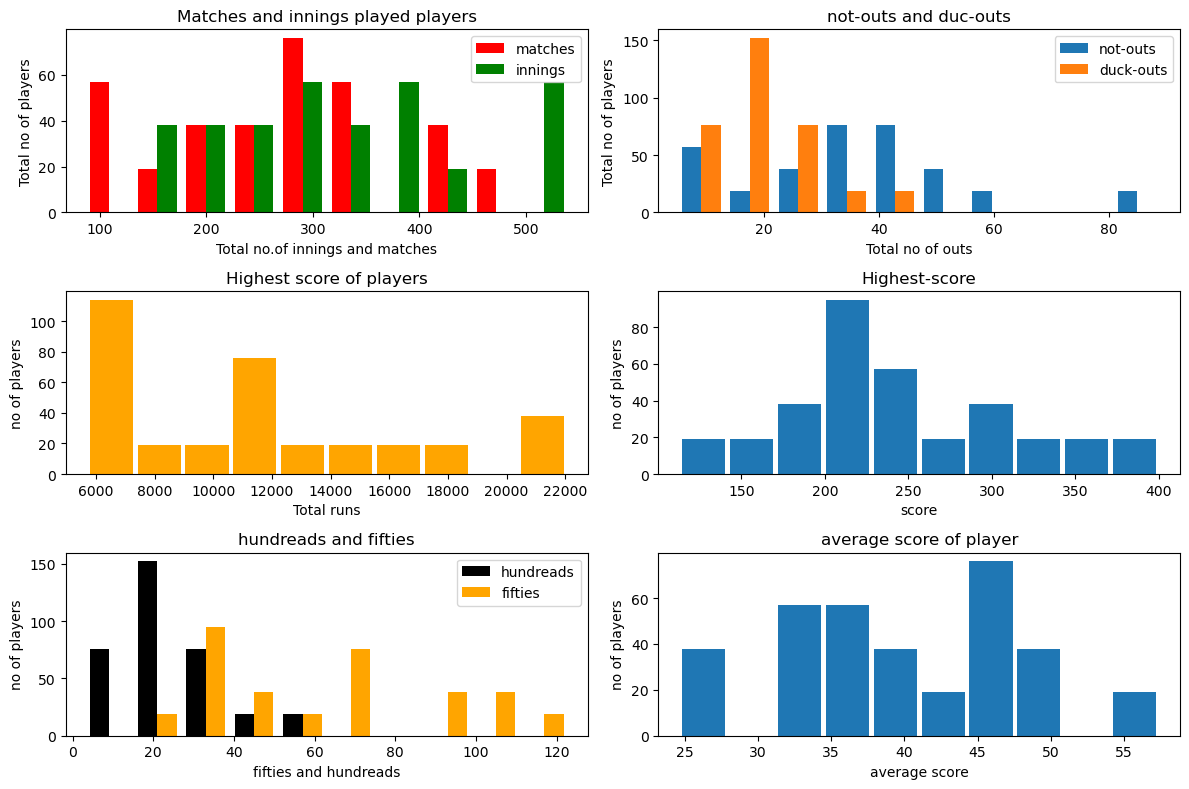

In [48]:
fig, ax = plt.subplots(3, 2, figsize=(12,8))

ax[0, 0].set_xlabel("Total no.of innings and matches")
ax[0, 0].set_ylabel("Total no of players")
ax[0, 0].set_title("Matches and innings played players")
ax[0, 0].hist(wi[["matches_played","innings"]],rwidth=0.8,color=["red","green"],label=["matches","innings"])
ax[0, 0].legend()

ax[0, 1].set_xlabel("Total no of outs")
ax[0, 1].set_ylabel("Total no of players")
ax[0, 1].set_title("not-outs and duc-outs")
ax[0, 1].hist(wi[["not_outs","ducks"]],rwidth=0.8,label=["not-outs","duck-outs"])
ax[0, 1].legend()

ax[1, 0].set_xlabel("Total runs")
ax[1, 0].set_ylabel("no of players")
ax[1, 0].set_title("Highest score of players")
ax[1, 0].hist(wi["total_runs"],rwidth=0.9,color="orange")

ax[1, 1].set_xlabel("score")
ax[1, 1].set_ylabel("no of players")
ax[1, 1].set_title("Highest-score")
ax[1, 1].hist(wi["highest_score"],rwidth=0.9)

ax[2, 0].set_xlabel("fifties and hundreads")
ax[2, 0].set_ylabel("no of players")
ax[2, 0].set_title("hundreads and fifties")
ax[2, 0].hist(wi[["hundreads","fifties"]],rwidth=0.8,color=["black","orange"],label=["hundreads","fifties"])
ax[2, 0].legend()

ax[2, 1].set_xlabel("average score")
ax[2, 1].set_ylabel("no of players")
ax[2, 1].set_title("average score of player")
ax[2, 1].hist(wi["average"],rwidth=0.9)

plt.tight_layout()
plt.show()


In [49]:
# sorting the column values to get top players based on the column vallues.
westindies=wi.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"],ascending=False)

In [50]:
#top 10 best players of westindies
westindies.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks
7,BC Lara,WI,1990-2007,419,510,37,22033,400,46.58,52,109,31
9,S Chanderpaul,WI,1994-2015,438,540,89,20445,203,45.33,39,123,20
12,CH Gayle,WI,1999-2021,460,530,32,18574,333,37.29,38,100,42
30,DL Haynes,WI,1978-1994,354,439,53,16135,184,41.80,35,96,23
33,IVA Richards,WI,1974-1991,308,349,36,15261,291,48.75,35,90,17
53,CG Greenidge,WI,1974-1991,236,312,29,12692,226,44.84,30,65,14
58,RB Richardson,WI,1983-1996,309,362,42,12192,194,38.10,21,71,16
62,RR Sarwan,WI,2000-2013,275,329,39,11535,291,39.77,19,71,21
63,CL Hooper,WI,1987-2003,323,374,56,11455,233,36.02,20,56,20
74,MN Samuels,WI,2000-2018,328,374,41,10800,260,32.43,17,63,25


In [51]:
# top 10 average players of westindies.
westindies.drop_duplicates().tail(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks
63,CL Hooper,WI,1987-2003,323,374,56,11455,233,36.02,20,56,20
74,MN Samuels,WI,2000-2018,328,374,41,10800,260,32.43,17,63,25
90,CH Lloyd,WI,1966-1985,197,244,33,9492,242,44.98,20,50,5
111,GS Sobers,WI,1954-1974,94,161,21,8032,365,57.37,26,30,13
134,DM Bravo,WI,2009-2022,195,250,22,7179,218,31.48,13,34,16
138,KC Brathwaite,WI,2011-2022,91,214,13,6988,212,34.76,14,40,18
150,SD Hope,WI,2015-2022,146,203,11,6592,147,34.33,15,30,7
158,RB Kanhai,WI,1957-1975,86,142,8,6391,256,47.69,15,30,7
161,DJ Bravo,WI,2004-2021,287,281,42,6343,113,26.53,5,27,22
187,JO Holder,WI,2013-2022,224,284,53,5697,202,24.66,3,25,30


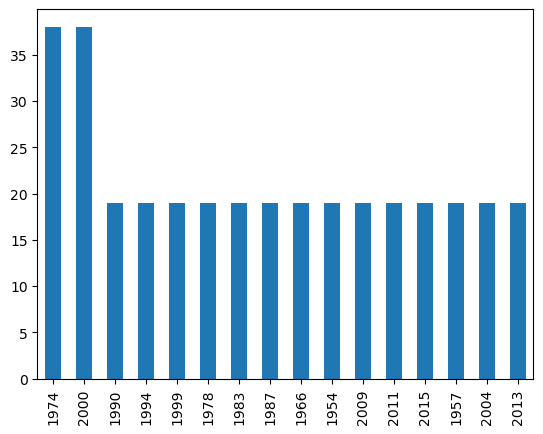

In [22]:
wi["starting_year"].value_counts().plot.bar()
plt.show()

- most of the players started their carrior in the years 1974,2000
- less and equal no of players from 2013,2009,1987 1966,1983,2004

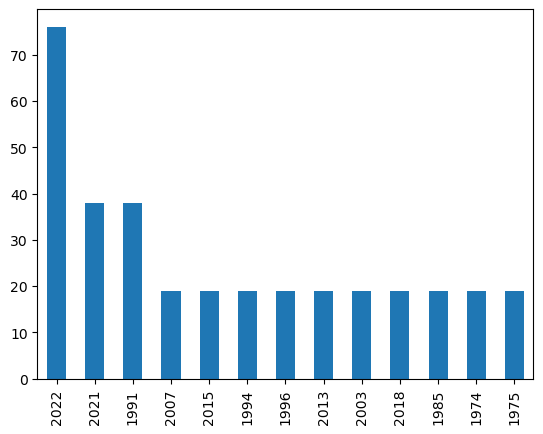

In [23]:
wi["ending_year"].value_counts().plot.bar()
plt.show()

- most of the players ended their carrior in the year 2022.
- less and equal no of in the year 1975,1985,1996,2007,2015,2018,2013

# SOUTH AFRICA

In [24]:
# analysing the sout-africa team
sa=a.get_group("SA")

In [53]:
sa

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks
5,JH Kallis,SA,1995-2014,495,596,91,24735,224,48.98,61,144,33
16,HM Amla,SA,2004-2019,338,426,35,18103,311,46.29,53,86,19
24,GC Smith,SA,2002-2014,337,421,25,16828,277,42.49,37,86,18
42,HH Gibbs,SA,1996-2010,346,403,23,14147,228,37.22,34,63,37
45,G Kirsten,SA,1993-2004,278,353,32,13530,275,42.14,32,76,23
...,...,...,...,...,...,...,...,...,...,...,...,...
3508,JN Rhodes,SA,1992-2003,289,297,59,8362,121,35.13,5,49,16
3509,DJ Cullinan,SA,1993-2001,205,245,25,8319,275,37.81,17,43,20
3541,SM Pollock,SA,1995-2008,401,357,110,6979,111,28.25,2,29,32
3547,D Elgar,SA,2012-2023,90,201,15,6746,199,36.26,15,31,18


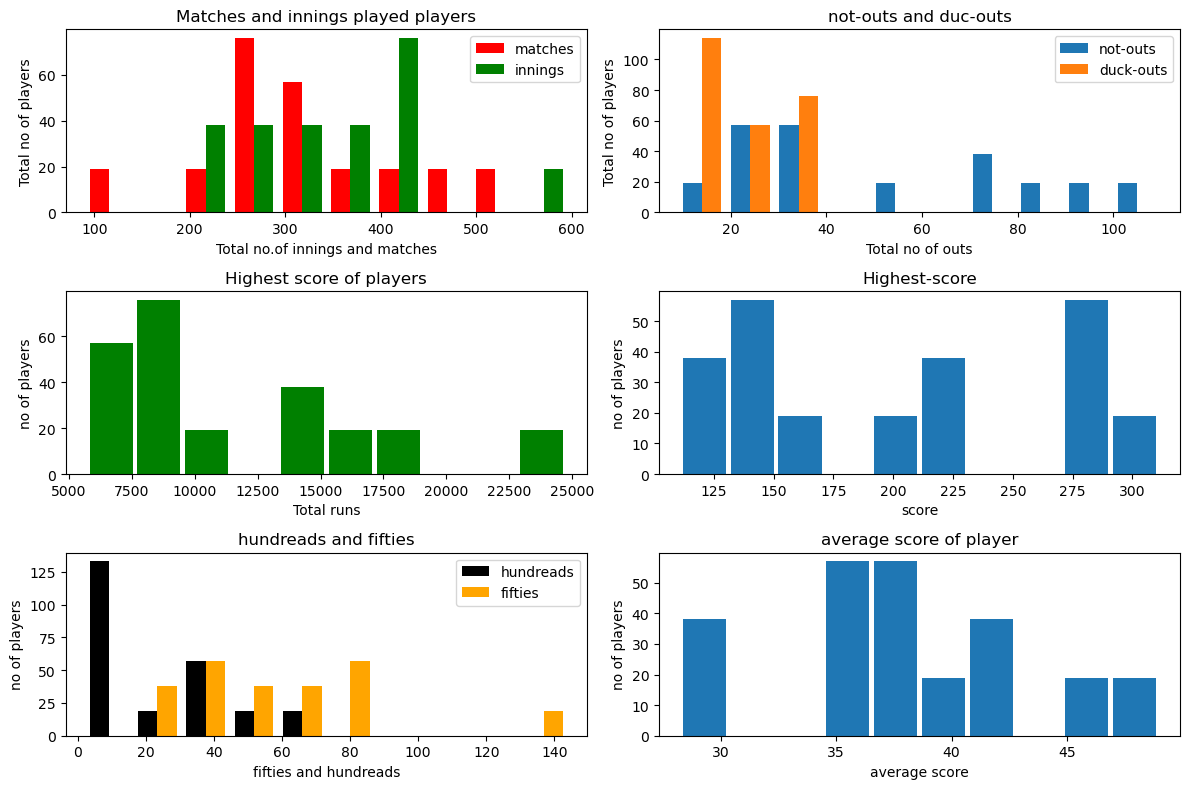

In [54]:
fig, ax = plt.subplots(3, 2, figsize=(12,8))

ax[0, 0].set_xlabel("Total no.of innings and matches")
ax[0, 0].set_ylabel("Total no of players")
ax[0, 0].set_title("Matches and innings played players")
ax[0, 0].hist(sa[["matches_played","innings"]],rwidth=0.8,color=["red","green"],label=["matches","innings"])
ax[0, 0].legend()

ax[0, 1].set_xlabel("Total no of outs")
ax[0, 1].set_ylabel("Total no of players")
ax[0, 1].set_title("not-outs and duc-outs")
ax[0, 1].hist(sa[["not_outs","ducks"]],rwidth=0.8,label=["not-outs","duck-outs"])
ax[0, 1].legend()

ax[1, 0].set_xlabel("Total runs")
ax[1, 0].set_ylabel("no of players")
ax[1, 0].set_title("Highest score of players")
ax[1, 0].hist(sa["total_runs"],rwidth=0.9,color="green")

ax[1, 1].set_xlabel("score")
ax[1, 1].set_ylabel("no of players")
ax[1, 1].set_title("Highest-score")
ax[1, 1].hist(sa["highest_score"],rwidth=0.9)

ax[2, 0].set_xlabel("fifties and hundreads")
ax[2, 0].set_ylabel("no of players")
ax[2, 0].set_title("hundreads and fifties")
ax[2, 0].hist(sa[["hundreads","fifties"]],rwidth=0.8,color=["black","orange"],label=["hundreads","fifties"])
ax[2, 0].legend()

ax[2, 1].set_xlabel("average score")
ax[2, 1].set_ylabel("no of players")
ax[2, 1].set_title("average score of player")
ax[2, 1].hist(sa["average"],rwidth=0.9)

plt.tight_layout()
plt.show()


In [19]:
# sorting the column values to get top players based on the column vallues.
southafrica=sa.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"],ascending=False)

In [20]:
# top 10 best players from southafrica
southafrica.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks,starting_year,ending_year
5,JH Kallis,SA,1995-2014,495,596,91,24735,224,48.98,61,144,33,1995,2014
16,HM Amla,SA,2004-2019,338,426,35,18103,311,46.29,53,86,19,2004,2019
24,GC Smith,SA,2002-2014,337,421,25,16828,277,42.49,37,86,18,2002,2014
42,HH Gibbs,SA,1996-2010,346,403,23,14147,228,37.22,34,63,37,1996,2010
45,G Kirsten,SA,1993-2004,278,353,32,13530,275,42.14,32,76,23,1993,2004
82,MV Boucher,SA,1997-2012,446,433,82,10050,147,28.63,6,57,32,1997,2012
96,WJ Cronje,SA,1992-2000,251,282,39,9116,135,37.51,8,60,19,1992,2000
101,JP Duminy,SA,2004-2019,316,319,71,8678,166,34.99,9,43,22,2004,2019
106,JN Rhodes,SA,1992-2003,289,297,59,8362,121,35.13,5,49,16,1992,2003
107,DJ Cullinan,SA,1993-2001,205,245,25,8319,275,37.81,17,43,20,1993,2001


In [21]:
# top 10 average players of southafrica
southafrica.drop_duplicates().tail(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks,starting_year,ending_year
42,HH Gibbs,SA,1996-2010,346,403,23,14147,228,37.22,34,63,37,1996,2010
45,G Kirsten,SA,1993-2004,278,353,32,13530,275,42.14,32,76,23,1993,2004
82,MV Boucher,SA,1997-2012,446,433,82,10050,147,28.63,6,57,32,1997,2012
96,WJ Cronje,SA,1992-2000,251,282,39,9116,135,37.51,8,60,19,1992,2000
101,JP Duminy,SA,2004-2019,316,319,71,8678,166,34.99,9,43,22,2004,2019
106,JN Rhodes,SA,1992-2003,289,297,59,8362,121,35.13,5,49,16,1992,2003
107,DJ Cullinan,SA,1993-2001,205,245,25,8319,275,37.81,17,43,20,1993,2001
139,SM Pollock,SA,1995-2008,401,357,110,6979,111,28.25,2,29,32,1995,2008
145,D Elgar,SA,2012-2023,90,201,15,6746,199,36.26,15,31,18,2012,2023
185,DA Miller,SA,2010-2022,245,217,72,5724,139,39.47,7,27,9,2010,2022


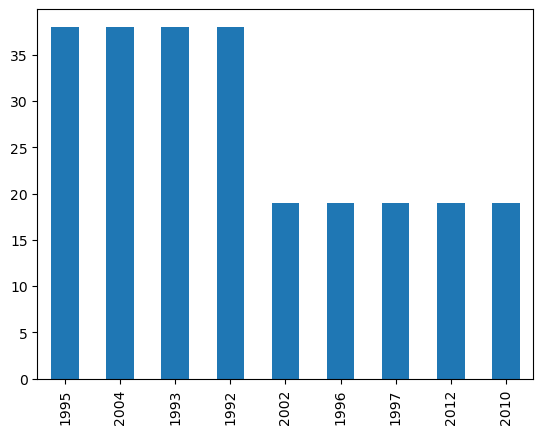

In [25]:
sa["starting_year"].value_counts().plot.bar()
plt.show()

- more no of players started their carrior in the year 1995,2004,1993,1992.
- least and equal no of in the years 2002,1996,1997,2012,2010


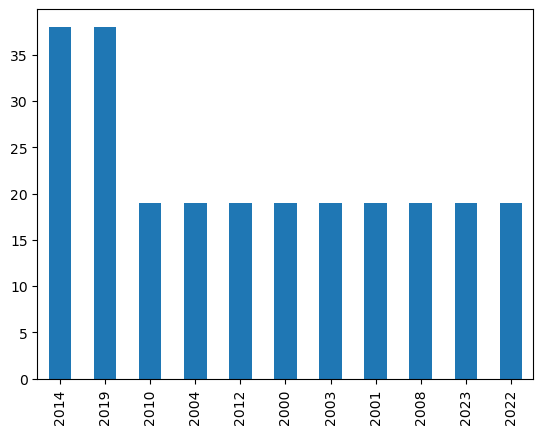

In [26]:
sa["ending_year"].value_counts().plot.bar()
plt.show()

- most players ended their carrior in the years 2014,2019.
- equal no of in 2022 2023,2008,2001,2003,2000

# NEWZLAND

In [27]:
nz=a.get_group("NZ")

In [28]:
nz

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks,starting_year,ending_year
13,LRPL Taylor,NZ,2006-2022,436,527,84,18398,290,41.53,40,90,29,2006,2022
15,KS Williamson,NZ,2010-2023,332,424,46,18232,251,48.23,42,96,19,2010,2023
34,SP Fleming,NZ,1994-2008,387,454,31,15044,274,35.56,17,92,33,1994,2008
41,BB McCullum,NZ,2002-2016,418,464,44,14198,302,33.80,17,75,37,2002,2016
51,MJ Guptill,NZ,2009-2022,346,392,25,12948,237,35.28,21,75,28,2009,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3516,CD McMillan,NZ,1997-2007,253,275,26,7810,142,31.36,9,46,16,1997,2007
3543,DL Vettori,NZ,1997-2015,427,376,81,6948,140,23.55,6,27,44,1997,2015
3564,SB Styris,NZ,1999-2011,237,230,26,6318,170,30.97,9,32,15,1999,2011
3573,AC Parore,NZ,1990-2002,254,287,51,6109,110,25.88,3,27,25,1990,2002


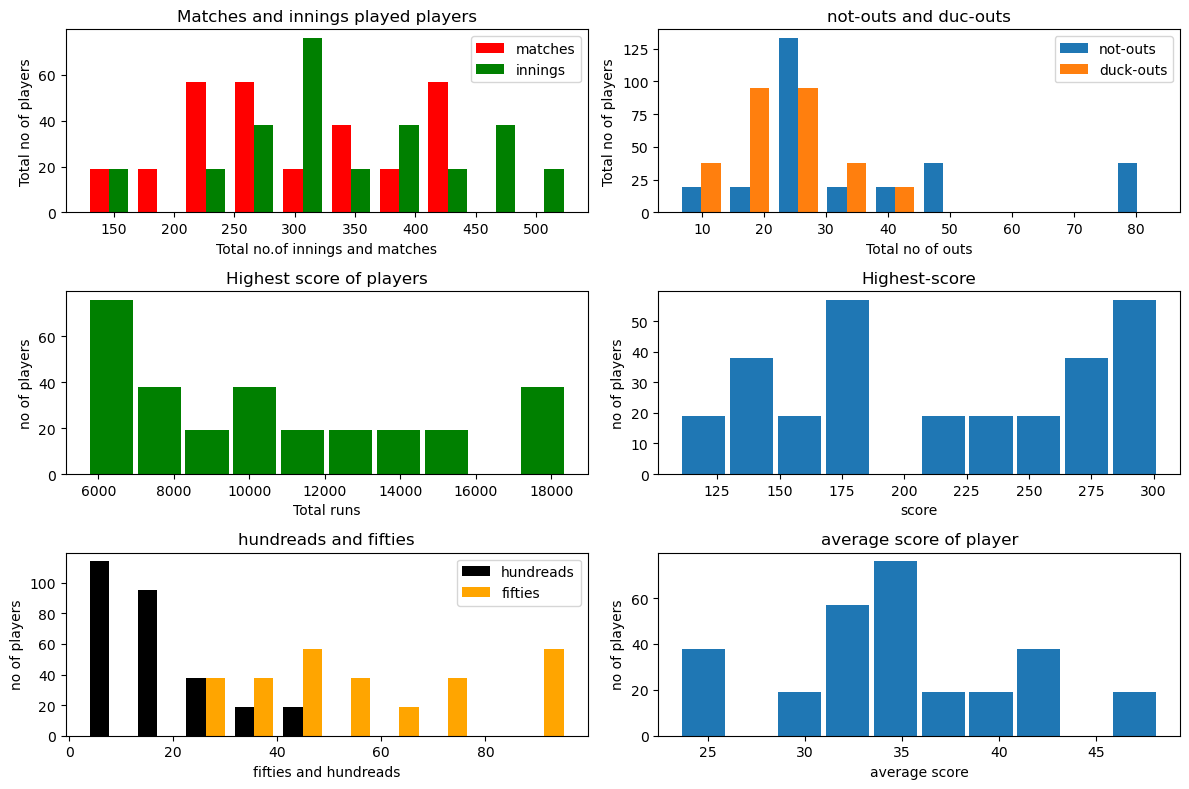

In [25]:
fig, ax = plt.subplots(3, 2, figsize=(12,8))

ax[0, 0].set_xlabel("Total no.of innings and matches")
ax[0, 0].set_ylabel("Total no of players")
ax[0, 0].set_title("Matches and innings played players")
ax[0, 0].hist(nz[["matches_played","innings"]],rwidth=0.8,color=["red","green"],label=["matches","innings"])
ax[0, 0].legend()

ax[0, 1].set_xlabel("Total no of outs")
ax[0, 1].set_ylabel("Total no of players")
ax[0, 1].set_title("not-outs and duc-outs")
ax[0, 1].hist(nz[["not_outs","ducks"]],rwidth=0.8,label=["not-outs","duck-outs"])
ax[0, 1].legend()

ax[1, 0].set_xlabel("Total runs")
ax[1, 0].set_ylabel("no of players")
ax[1, 0].set_title("Highest score of players")
ax[1, 0].hist(nz["total_runs"],rwidth=0.9,color="green")

ax[1, 1].set_xlabel("score")
ax[1, 1].set_ylabel("no of players")
ax[1, 1].set_title("Highest-score")
ax[1, 1].hist(nz["highest_score"],rwidth=0.9)

ax[2, 0].set_xlabel("fifties and hundreads")
ax[2, 0].set_ylabel("no of players")
ax[2, 0].set_title("hundreads and fifties")
ax[2, 0].hist(nz[["hundreads","fifties"]],rwidth=0.8,color=["black","orange"],label=["hundreads","fifties"])
ax[2, 0].legend()

ax[2, 1].set_xlabel("average score")
ax[2, 1].set_ylabel("no of players")
ax[2, 1].set_title("average score of player")
ax[2, 1].hist(nz["average"],rwidth=0.9)

plt.tight_layout()
plt.show()


In [27]:
# sorting the column values to get top players based on the column vallues.
newzland=nz.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"],ascending=False)

In [28]:
# top 10 best players from newzland
newzland.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks,starting_year,ending_year
13,LRPL Taylor,NZ,2006-2022,436,527,84,18398,290,41.53,40,90,29,2006,2022
15,KS Williamson,NZ,2010-2023,332,424,46,18232,251,48.23,42,96,19,2010,2023
34,SP Fleming,NZ,1994-2008,387,454,31,15044,274,35.56,17,92,33,1994,2008
41,BB McCullum,NZ,2002-2016,418,464,44,14198,302,33.80,17,75,37,2002,2016
51,MJ Guptill,NZ,2009-2022,346,392,25,12948,237,35.28,21,75,28,2009,2022
60,NJ Astle,NZ,1995-2007,303,353,24,11697,222,35.55,26,65,29,1995,2007
78,TWM Latham,NZ,2012-2023,202,294,24,10329,264,38.25,23,55,24,2012,2023
80,MD Crowe,NZ,1982-1995,220,271,29,10148,299,41.93,21,52,12,1982,1995
94,JG Wright,NZ,1978-1993,231,296,8,9225,185,32.03,13,47,16,1978,1993
110,CL Cairns,NZ,1989-2006,273,293,29,8092,158,30.65,9,46,16,1989,2006


In [29]:
# top 10 average players from newzland
newzland.drop_duplicates().tail(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks,starting_year,ending_year
60,NJ Astle,NZ,1995-2007,303,353,24,11697,222,35.55,26,65,29,1995,2007
78,TWM Latham,NZ,2012-2023,202,294,24,10329,264,38.25,23,55,24,2012,2023
80,MD Crowe,NZ,1982-1995,220,271,29,10148,299,41.93,21,52,12,1982,1995
94,JG Wright,NZ,1978-1993,231,296,8,9225,185,32.03,13,47,16,1978,1993
110,CL Cairns,NZ,1989-2006,273,293,29,8092,158,30.65,9,46,16,1989,2006
114,CD McMillan,NZ,1997-2007,253,275,26,7810,142,31.36,9,46,16,1997,2007
141,DL Vettori,NZ,1997-2015,427,376,81,6948,140,23.55,6,27,44,1997,2015
162,SB Styris,NZ,1999-2011,237,230,26,6318,170,30.97,9,32,15,1999,2011
171,AC Parore,NZ,1990-2002,254,287,51,6109,110,25.88,3,27,25,1990,2002
186,AH Jones,NZ,1987-1995,126,161,17,5706,186,39.62,7,36,6,1987,1995


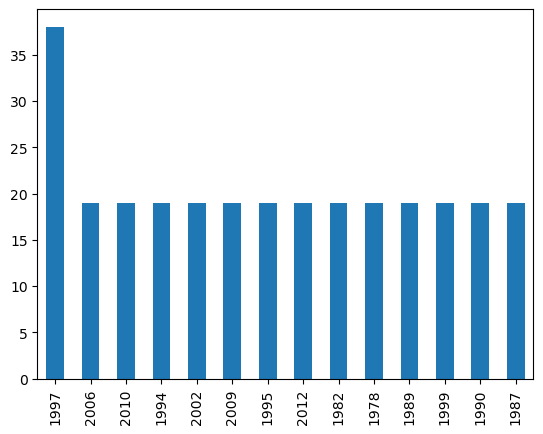

In [30]:
nz["starting_year"].value_counts().plot.bar()
plt.show()

- most players started their carrior in the year 1997.
- 2006,1987,1990,1999,1982,2012, has equal no of players started their carrior.

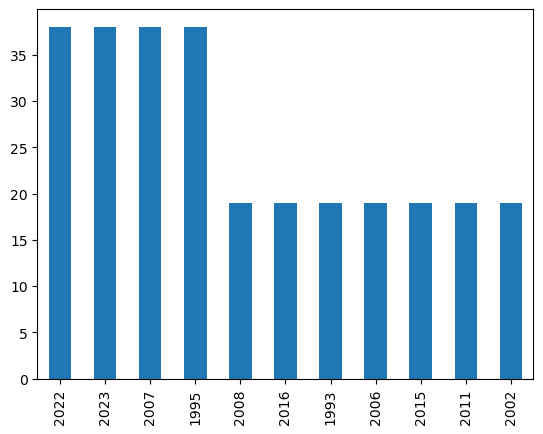

In [29]:
nz["ending_year"].value_counts().plot.bar()
plt.show()

- most no of players has ended their carrior in the years 2022,2023,2007,1995.
- less in the years and also equal 2011 2015,2006,2008.

# SREELANKA

In [31]:
sl=a.get_group("SL")

In [32]:
sl

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks,starting_year,ending_year
1,KC Sangakkara,SL,2000-2015,571,644,63,27151,319,46.73,61,148,27,2000,2015
4,DPMD Jayawardene,SL,1997-2015,629,704,59,25024,374,38.79,52,129,46,1997,2015
10,ST Jayasuriya,SL,1989-2011,568,633,34,20441,340,34.12,41,102,53,1989,2011
22,TM Dilshan,SL,1999-2016,482,513,62,17174,193,38.07,37,81,34,1999,2016
38,AD Mathews,SL,2008-2022,385,452,93,14846,200,41.35,19,86,22,2008,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568,HDRL Thirimanne,SL,2010-2022,194,229,21,6277,155,30.17,9,36,22,2010,2022
3569,AP Gurusinha,SL,1985-1996,186,212,12,6274,143,31.37,9,29,14,1985,1996
3575,MDKJ Perera,SL,2013-2021,181,212,8,6051,153,29.66,8,38,17,2013,2021
3581,N Dickwella,SL,2014-2022,136,208,12,5901,116,30.10,2,42,7,2014,2022


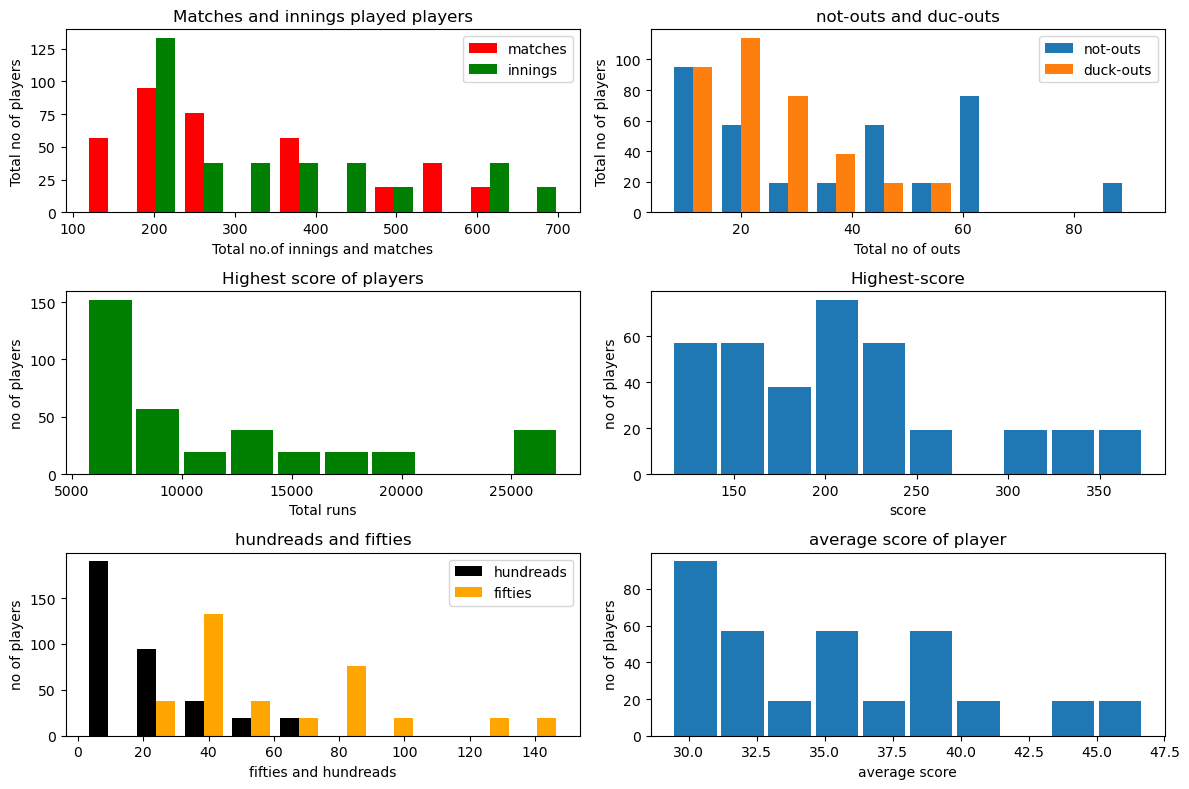

In [36]:
fig, ax = plt.subplots(3, 2, figsize=(12,8))

ax[0, 0].set_xlabel("Total no.of innings and matches")
ax[0, 0].set_ylabel("Total no of players")
ax[0, 0].set_title("Matches and innings played players")
ax[0, 0].hist(sl[["matches_played","innings"]],rwidth=0.8,color=["red","green"],label=["matches","innings"])
ax[0, 0].legend()

ax[0, 1].set_xlabel("Total no of outs")
ax[0, 1].set_ylabel("Total no of players")
ax[0, 1].set_title("not-outs and duc-outs")
ax[0, 1].hist(sl[["not_outs","ducks"]],rwidth=0.8,label=["not-outs","duck-outs"])
ax[0, 1].legend()

ax[1, 0].set_xlabel("Total runs")
ax[1, 0].set_ylabel("no of players")
ax[1, 0].set_title("Highest score of players")
ax[1, 0].hist(sl["total_runs"],rwidth=0.9,color="green")

ax[1, 1].set_xlabel("score")
ax[1, 1].set_ylabel("no of players")
ax[1, 1].set_title("Highest-score")
ax[1, 1].hist(sl["highest_score"],rwidth=0.9)

ax[2, 0].set_xlabel("fifties and hundreads")
ax[2, 0].set_ylabel("no of players")
ax[2, 0].set_title("hundreads and fifties")
ax[2, 0].hist(sl[["hundreads","fifties"]],rwidth=0.8,color=["black","orange"],label=["hundreads","fifties"])
ax[2, 0].legend()

ax[2, 1].set_xlabel("average score")
ax[2, 1].set_ylabel("no of players")
ax[2, 1].set_title("average score of player")
ax[2, 1].hist(sl["average"],rwidth=0.9)

plt.tight_layout()
plt.show()


In [37]:
# sorting the column values to get top players based on the column vallues.
sreelanka=sl.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"],ascending=False)

In [38]:
#top 10 players from the sreelanka
sreelanka.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks,starting_year,ending_year
1,KC Sangakkara,SL,2000-2015,571,644,63,27151,319,46.73,61,148,27,2000,2015
4,DPMD Jayawardene,SL,1997-2015,629,704,59,25024,374,38.79,52,129,46,1997,2015
10,ST Jayasuriya,SL,1989-2011,568,633,34,20441,340,34.12,41,102,53,1989,2011
22,TM Dilshan,SL,1999-2016,482,513,62,17174,193,38.07,37,81,34,1999,2016
38,AD Mathews,SL,2008-2022,385,452,93,14846,200,41.35,19,86,22,2008,2022
43,MS Atapattu,SL,1990-2007,355,411,46,13817,249,37.85,26,75,35,1990,2007
55,A Ranatunga,SL,1982-2000,359,408,57,12468,135,35.52,8,86,30,1982,2000
70,LD Chandimal,SL,2010-2022,287,359,45,11011,206,35.06,18,62,17,2010,2022
99,WU Tharanga,SL,2005-2019,281,296,19,8854,174,31.96,18,43,25,2005,2019
105,FDM Karunaratne,SL,2011-2022,114,226,9,8583,244,39.55,20,45,15,2011,2022


In [39]:
# top 10 average players from sreelanka
sreelanka.drop_duplicates().tail(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks,starting_year,ending_year
105,FDM Karunaratne,SL,2011-2022,114,226,9,8583,244,39.55,20,45,15,2011,2022
108,HP Tillakaratne,SL,1986-2004,278,296,65,8268,204,35.79,13,33,18,1986,2004
116,RS Mahanama,SL,1986-1999,263,286,23,7738,225,29.42,8,46,22,1986,1999
118,BKG Mendis,SL,2015-2023,192,273,12,7667,196,29.37,9,48,32,2015,2023
163,TT Samaraweera,SL,1998-2013,132,173,30,6306,231,44.09,16,30,15,1998,2013
166,HDRL Thirimanne,SL,2010-2022,194,229,21,6277,155,30.17,9,36,22,2010,2022
167,AP Gurusinha,SL,1985-1996,186,212,12,6274,143,31.37,9,29,14,1985,1996
173,MDKJ Perera,SL,2013-2021,181,212,8,6051,153,29.66,8,38,17,2013,2021
179,N Dickwella,SL,2014-2022,136,208,12,5901,116,30.10,2,42,7,2014,2022
188,RP Arnold,SL,1997-2007,219,221,44,5687,123,32.12,4,38,14,1997,2007


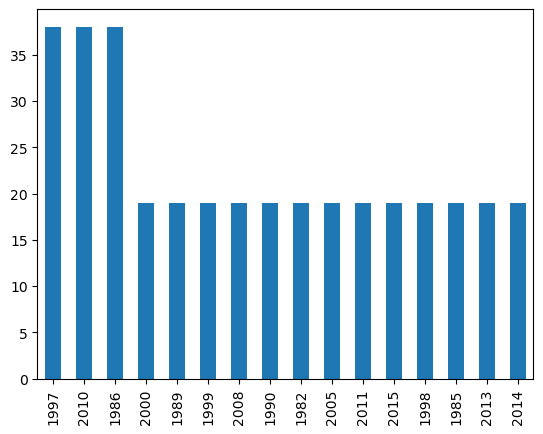

In [33]:
sl["starting_year"].value_counts().plot.bar()
plt.show()

- most no of players started their carrior in the years 1997,1986,2010.
- 2014,1990,2011,2013,2115,2008, has equal no of players started thier carrior.

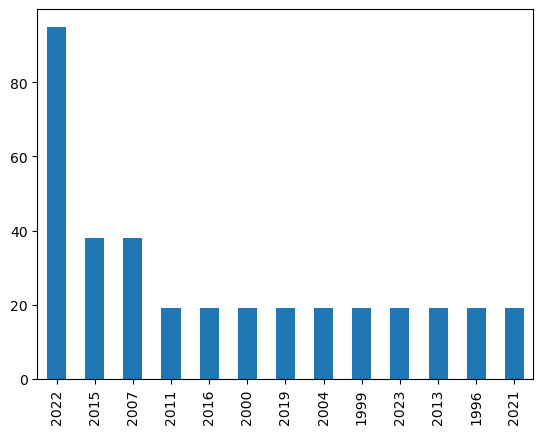

In [34]:
sl["ending_year"].value_counts().plot.bar()
plt.show()

- most players ended their carrior in the year 2022.
- 2011,2021,2004,2000,1999,1996 are equal no of players are retired.

# BANGLADESH

In [35]:
ban=a.get_group("BAN")

In [36]:
ban

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks,starting_year,ending_year
35,Tamim Iqbal,BAN,2007-2022,344,442,16,15016,206,35.24,25,95,37,2007,2022
39,Mushfiqur Rahim,BAN,2005-2022,392,489,67,14839,219,35.16,20,81,31,2005,2022
127,Litton Das,BAN,2015-2022,155,232,8,7423,176,33.13,13,40,15,2015,2022
175,Mohammad Ashraful,BAN,2001-2013,233,286,13,5992,190,21.94,8,27,31,2001,2013
224,Tamim Iqbal,BAN,2007-2022,344,442,16,15016,206,35.24,25,95,37,2007,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388,Mohammad Ashraful,BAN,2001-2013,233,286,13,5992,190,21.94,8,27,31,2001,2013
3437,Tamim Iqbal,BAN,2007-2022,344,442,16,15016,206,35.24,25,95,37,2007,2022
3441,Mushfiqur Rahim,BAN,2005-2022,392,489,67,14839,219,35.16,20,81,31,2005,2022
3529,Litton Das,BAN,2015-2022,155,232,8,7423,176,33.13,13,40,15,2015,2022


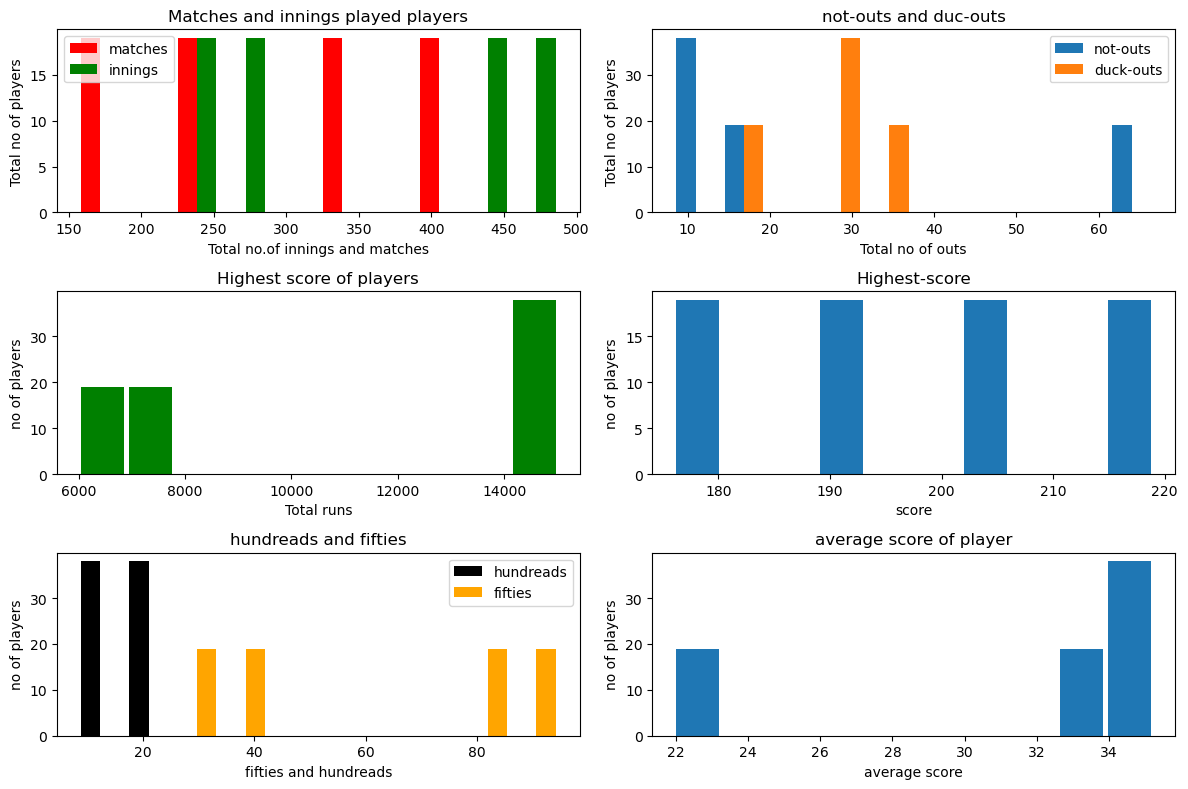

In [43]:
fig, ax = plt.subplots(3, 2, figsize=(12,8))

ax[0, 0].set_xlabel("Total no.of innings and matches")
ax[0, 0].set_ylabel("Total no of players")
ax[0, 0].set_title("Matches and innings played players")
ax[0, 0].hist(ban[["matches_played","innings"]],rwidth=0.8,color=["red","green"],label=["matches","innings"])
ax[0, 0].legend()

ax[0, 1].set_xlabel("Total no of outs")
ax[0, 1].set_ylabel("Total no of players")
ax[0, 1].set_title("not-outs and duc-outs")
ax[0, 1].hist(ban[["not_outs","ducks"]],rwidth=0.8,label=["not-outs","duck-outs"])
ax[0, 1].legend()

ax[1, 0].set_xlabel("Total runs")
ax[1, 0].set_ylabel("no of players")
ax[1, 0].set_title("Highest score of players")
ax[1, 0].hist(ban["total_runs"],rwidth=0.9,color="green")

ax[1, 1].set_xlabel("score")
ax[1, 1].set_ylabel("no of players")
ax[1, 1].set_title("Highest-score")
ax[1, 1].hist(ban["highest_score"],rwidth=0.9)

ax[2, 0].set_xlabel("fifties and hundreads")
ax[2, 0].set_ylabel("no of players")
ax[2, 0].set_title("hundreads and fifties")
ax[2, 0].hist(ban[["hundreads","fifties"]],rwidth=0.8,color=["black","orange"],label=["hundreads","fifties"])
ax[2, 0].legend()

ax[2, 1].set_xlabel("average score")
ax[2, 1].set_ylabel("no of players")
ax[2, 1].set_title("average score of player")
ax[2, 1].hist(ban["average"],rwidth=0.9)

plt.tight_layout()
plt.show()


In [44]:
# sorting the column values to get top players based on the column vallues.
bangladesh=ban.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"],ascending=False)

In [45]:
# top 10 best players from bangladesh.
bangladesh.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks,starting_year,ending_year
35,Tamim Iqbal,BAN,2007-2022,344,442,16,15016,206,35.24,25,95,37,2007,2022
39,Mushfiqur Rahim,BAN,2005-2022,392,489,67,14839,219,35.16,20,81,31,2005,2022
127,Litton Das,BAN,2015-2022,155,232,8,7423,176,33.13,13,40,15,2015,2022
175,Mohammad Ashraful,BAN,2001-2013,233,286,13,5992,190,21.94,8,27,31,2001,2013


In [46]:
# top 10 average players from bangladesh.
bangladesh.drop_duplicates().tail(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks,starting_year,ending_year
35,Tamim Iqbal,BAN,2007-2022,344,442,16,15016,206,35.24,25,95,37,2007,2022
39,Mushfiqur Rahim,BAN,2005-2022,392,489,67,14839,219,35.16,20,81,31,2005,2022
127,Litton Das,BAN,2015-2022,155,232,8,7423,176,33.13,13,40,15,2015,2022
175,Mohammad Ashraful,BAN,2001-2013,233,286,13,5992,190,21.94,8,27,31,2001,2013


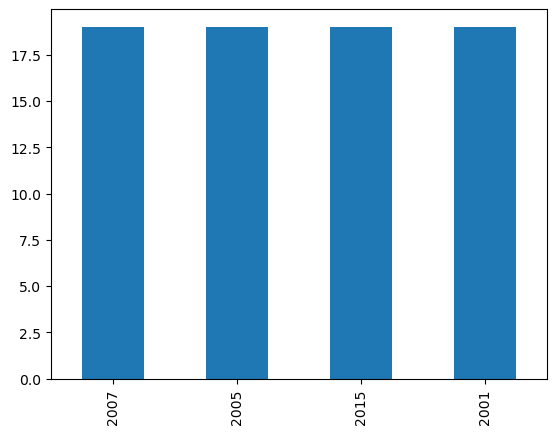

In [37]:
ban["starting_year"].value_counts().plot.bar()
plt.show()

- from the years 2007,2005,2015,2001 equal no of players started their carrier.

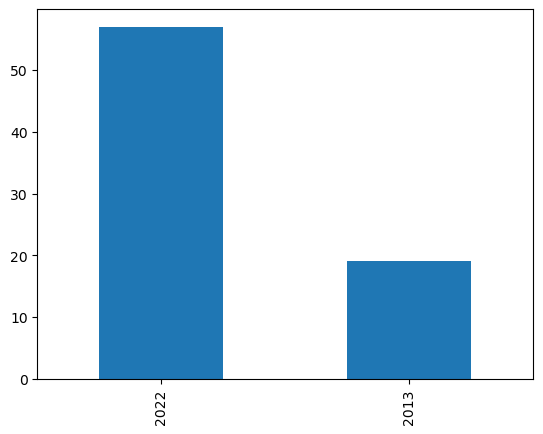

In [38]:
ban["ending_year"].value_counts().plot.bar()
plt.show()

- most players ended their carrior in 2022 less in 2013

# ZIMBOMBAY

In [39]:
zim=a.get_group("ZIM")

In [40]:
zim

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks,starting_year,ending_year
73,A Flower,ZIM,1992-2003,259,304,32,10862,232,39.93,16,73,18,1992,2003
93,GW Flower,ZIM,1992-2010,271,322,22,9361,201,31.20,11,50,34,1992,2010
100,BRM Taylor,ZIM,2004-2021,245,284,22,8778,171,33.50,17,48,21,2004,2021
109,H Masakadza,ZIM,2001-2019,270,307,5,8229,158,27.24,8,45,22,2001,2019
117,ADR Campbell,ZIM,1992-2002,233,279,15,7724,131,29.25,9,46,19,1992,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,A Flower,ZIM,1992-2003,259,304,32,10862,232,39.93,16,73,18,1992,2003
3495,GW Flower,ZIM,1992-2010,271,322,22,9361,201,31.20,11,50,34,1992,2010
3502,BRM Taylor,ZIM,2004-2021,245,284,22,8778,171,33.50,17,48,21,2004,2021
3511,H Masakadza,ZIM,2001-2019,270,307,5,8229,158,27.24,8,45,22,2001,2019


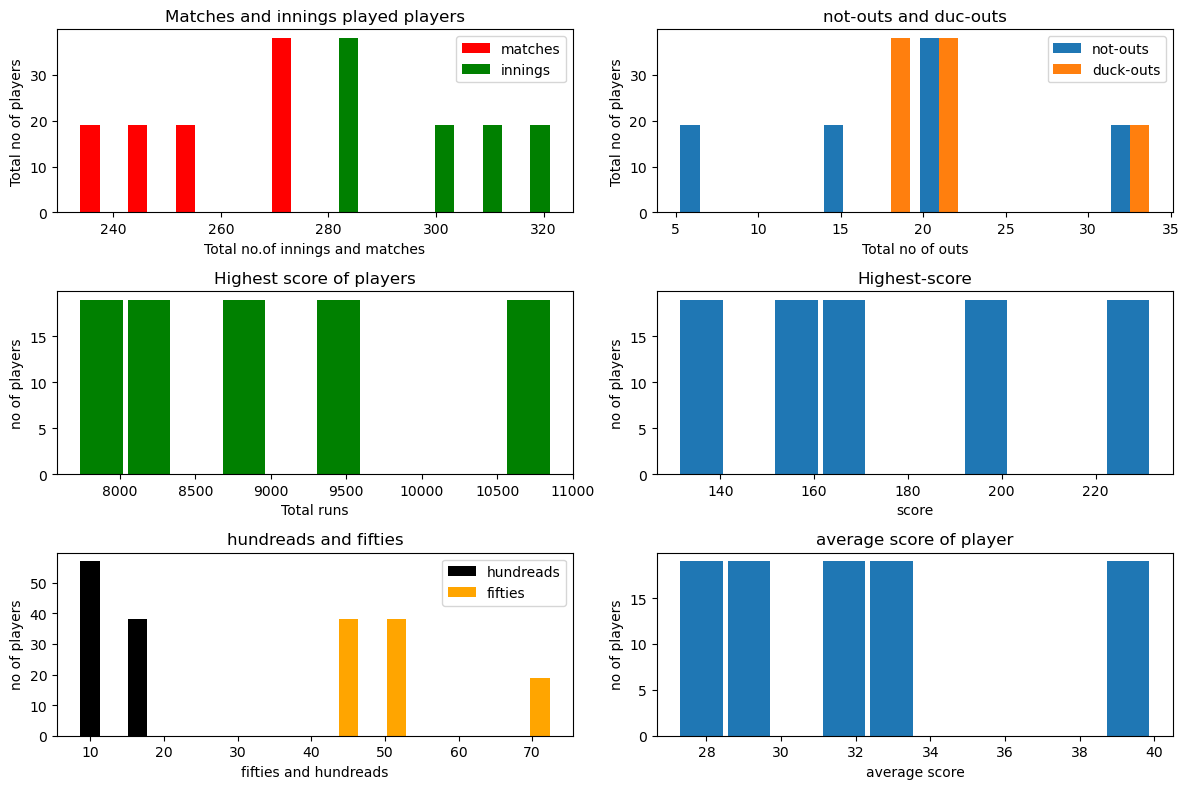

In [49]:
fig, ax = plt.subplots(3, 2, figsize=(12,8))

ax[0, 0].set_xlabel("Total no.of innings and matches")
ax[0, 0].set_ylabel("Total no of players")
ax[0, 0].set_title("Matches and innings played players")
ax[0, 0].hist(zim[["matches_played","innings"]],rwidth=0.8,color=["red","green"],label=["matches","innings"])
ax[0, 0].legend()

ax[0, 1].set_xlabel("Total no of outs")
ax[0, 1].set_ylabel("Total no of players")
ax[0, 1].set_title("not-outs and duc-outs")
ax[0, 1].hist(zim[["not_outs","ducks"]],rwidth=0.8,label=["not-outs","duck-outs"])
ax[0, 1].legend()

ax[1, 0].set_xlabel("Total runs")
ax[1, 0].set_ylabel("no of players")
ax[1, 0].set_title("Highest score of players")
ax[1, 0].hist(zim["total_runs"],rwidth=0.9,color="green")

ax[1, 1].set_xlabel("score")
ax[1, 1].set_ylabel("no of players")
ax[1, 1].set_title("Highest-score")
ax[1, 1].hist(zim["highest_score"],rwidth=0.9)

ax[2, 0].set_xlabel("fifties and hundreads")
ax[2, 0].set_ylabel("no of players")
ax[2, 0].set_title("hundreads and fifties")
ax[2, 0].hist(zim[["hundreads","fifties"]],rwidth=0.8,color=["black","orange"],label=["hundreads","fifties"])
ax[2, 0].legend()

ax[2, 1].set_xlabel("average score")
ax[2, 1].set_ylabel("no of players")
ax[2, 1].set_title("average score of player")
ax[2, 1].hist(zim["average"],rwidth=0.9)

plt.tight_layout()
plt.show()


In [50]:
# sorting the column values to get top players based on the column vallues.
zimbombay=zim.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"],ascending=False)

In [51]:
# top 10 players of zimbombay.
zimbombay.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks,starting_year,ending_year
73,A Flower,ZIM,1992-2003,259,304,32,10862,232,39.93,16,73,18,1992,2003
93,GW Flower,ZIM,1992-2010,271,322,22,9361,201,31.20,11,50,34,1992,2010
100,BRM Taylor,ZIM,2004-2021,245,284,22,8778,171,33.50,17,48,21,2004,2021
109,H Masakadza,ZIM,2001-2019,270,307,5,8229,158,27.24,8,45,22,2001,2019
117,ADR Campbell,ZIM,1992-2002,233,279,15,7724,131,29.25,9,46,19,1992,2002


In [52]:
# top 10 average players of zimbombay
zimbombay.drop_duplicates().tail(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks,starting_year,ending_year
73,A Flower,ZIM,1992-2003,259,304,32,10862,232,39.93,16,73,18,1992,2003
93,GW Flower,ZIM,1992-2010,271,322,22,9361,201,31.20,11,50,34,1992,2010
100,BRM Taylor,ZIM,2004-2021,245,284,22,8778,171,33.50,17,48,21,2004,2021
109,H Masakadza,ZIM,2001-2019,270,307,5,8229,158,27.24,8,45,22,2001,2019
117,ADR Campbell,ZIM,1992-2002,233,279,15,7724,131,29.25,9,46,19,1992,2002


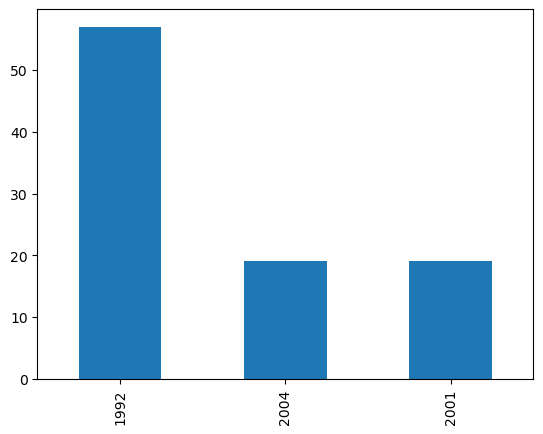

In [41]:
zim["starting_year"].value_counts().plot.bar()
plt.show()

- most players started their carrion in the year 1992.
- from 2001 and 2004 less no of players

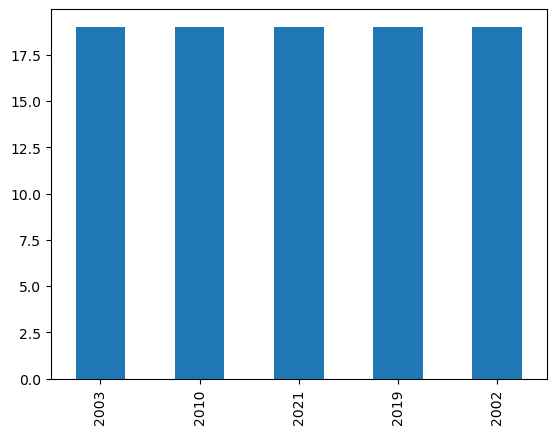

In [42]:
zim["ending_year"].value_counts().plot.bar()
plt.show()

- from 2003 2010 2021 2019 2022 equal no of players retaired 

In [48]:
data

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks,starting_year,ending_year
0,SR Tendulkar,IND,1989-2013,646,765,70,33299,248,47.91,95,160,34,1989,2013
1,KC Sangakkara,SL,2000-2015,571,644,63,27151,319,46.73,61,148,27,2000,2015
2,RT Ponting,AUS,1995-2012,542,653,69,26844,257,45.96,69,143,39,1995,2012
3,V Kohli,IND,2008-2023,478,591,80,26479,254,51.81,76,139,39,2008,2023
4,DPMD Jayawardene,SL,1997-2015,629,704,59,25024,374,38.79,52,129,46,1997,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3586,A Jadeja,IND,1992-2000,205,198,37,5726,119,35.56,6,31,11,1992,2000
3587,DA Miller,SA,2010-2022,245,217,72,5724,139,39.47,7,27,9,2010,2022
3588,AH Jones,NZ,1987-1995,126,161,17,5706,186,39.62,7,36,6,1987,1995
3589,JO Holder,WI,2013-2022,224,284,53,5697,202,24.66,3,25,30,2013,2022


In [49]:
data.corr()

,matches_played,innings,not_outs,total_runs,highest_score,average,hundreads,fifties,ducks
matches_played,1.000000,0.953112,0.715425,0.782974,0.172150,-0.165042,0.510959,0.756169,0.741215
innings,0.953112,1.000000,0.622888,0.906391,0.314492,-0.052768,0.681862,0.874100,0.741353
not_outs,0.715425,0.622888,1.000000,0.460461,-0.054112,-0.025416,0.218017,0.463799,0.369044
total_runs,0.782974,0.906391,0.460461,1.000000,0.502683,0.301811,0.905498,0.963692,0.530093
highest_score,0.172150,0.314492,-0.054112,0.502683,1.000000,0.513771,0.598492,0.407057,0.147483
average,-0.165042,-0.052768,-0.025416,0.301811,0.513771,1.000000,0.518407,0.264272,-0.342572
hundreads,0.510959,0.681862,0.218017,0.905498,0.598492,0.518407,1.000000,0.821634,0.339882
fifties,0.756169,0.874100,0.463799,0.963692,0.407057,0.264272,0.821634,1.000000,0.477478
ducks,0.741215,0.741353,0.369044,0.530093,0.147483,-0.342572,0.339882,0.477478,1.000000


<AxesSubplot:>

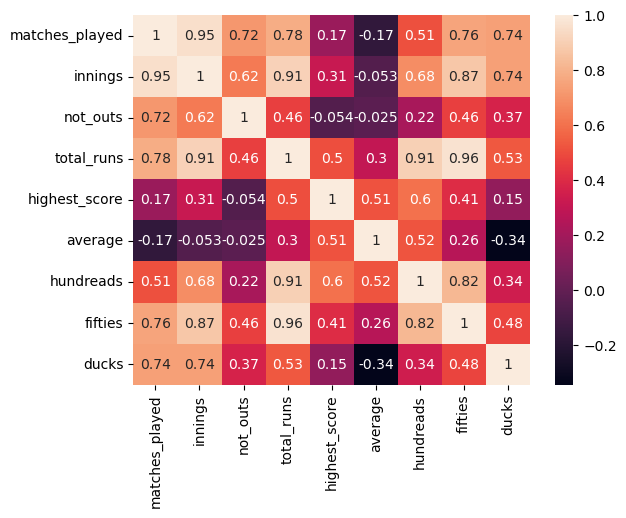

In [52]:
sns.heatmap(data.corr(),annot=True)

- from the above plot we say that average and matches played are negatively coorelated,that means if the matches played by player increases the average will decreases.
- the player highest score and not outs are in negatively coorelated, the played reached his highest score he going to out.
- if average and ducks are negatively coorelated,if the player average increases ducks will decreases.


# conclusion
- The players have to maintain a good average on every match it will make them the top player of their team as well as world.

## conclusion (team wise)

- India : Indian players has to decrease the duck out counts to become best team after some years.
- Australia : has to maintain good average increase the high score and total runs.
- Pakistan : has to increase high-score and total runs matches played.
- England : has to increase matches played ,total runs , high score.
- West indies : has to increase matches played and total runs.
- South Africa : has to increase high score , total runs average,matches played.
- Newzeland : has to increase matchesplayed, average, total runs , highest score.
- Sri lanka : has to increase highest score total runs average.
- Bangladesh :  has to imcrease high score , total runs average centuries , player count 
- Zimbabwe : total runs centuries fifties matches played and has to decrese the duck outs,player count
